### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

In [1]:
# Importing required library
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Input the data and display.
H_data= pd.read_csv("train.csv")
H_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Understanding, Preparation and EDA

In [3]:
# Obtain the shape of Dataset
H_data.shape

(1460, 81)

In [4]:
#Find the data type of each variable and check if there is any null count
H_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Find the missing values in the data set 

missing_values = H_data.isnull().sum()
missing_values[missing_values != 0].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [6]:
# Handle the missing values.
Columns_basement=['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond']
for column_b in Columns_basement:
    H_data[column_b] =H_data[column_b].fillna('No_Basement')
Columns_Garage=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for column_g in Columns_Garage:
    H_data[column_g] = H_data[column_g].fillna('No_Garage')

In [7]:
H_data['GarageYrBlt'] = H_data['GarageYrBlt'].fillna(0)
H_data['MasVnrArea'] = H_data['MasVnrArea'].fillna(0)
H_data['MasVnrArea'] = H_data['MasVnrArea'].fillna(0)

In [8]:
H_data['GarageYrBlt'] = H_data['GarageYrBlt'].astype(int)

In [9]:
# Handle the missing values.
H_data['PoolQC'] = H_data['PoolQC'].fillna('No_Pool')
H_data['MasVnrType'] = H_data['MasVnrType'].fillna('None')
H_data['Electrical'] = H_data['Electrical'].fillna("Other")
H_data['Fence'] = H_data['Fence'].fillna('No_Fence')
H_data['FireplaceQu'] = H_data['FireplaceQu'].fillna('No_Fireplace')
H_data['MiscFeature'] = H_data['MiscFeature'].fillna('None')
H_data['Alley'] = H_data['Alley'].fillna('No_Alley_Access')

In [10]:
# Dropping ID Columns as this is unnecessary.
H_data.drop('Id', axis=1, inplace=True)

In [11]:
# Dropping the LotFontgage columns because it contains more null values
H_data.drop("LotFrontage",axis = 1, inplace=True)

In [12]:
# Display the updated info of the dataset to check if there are any null values.
H_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [13]:
#Display the statistics of each variable 
H_data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Our Target variable is SalePrice, So we need to anayze each variable against the SalePrice, which one is affecting most, as well before that we need to remove some of the categorical variable, too. After that we will convert this categorical variable to dummy variable for model building

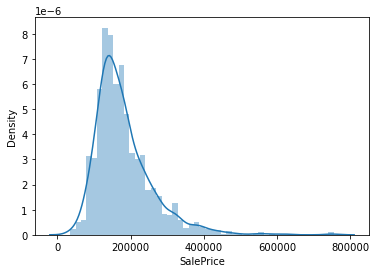

In [14]:
sns.distplot(H_data['SalePrice'])
plt.show()

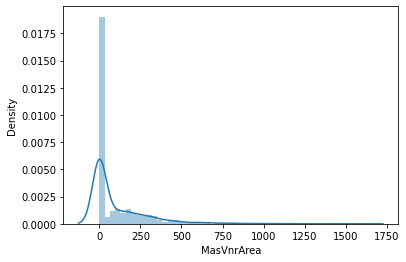

In [15]:
#Plotting distribution plots.
sns.distplot(H_data['MasVnrArea'])
plt.show()

Text(0.5, 1.0, 'Condition of basement')

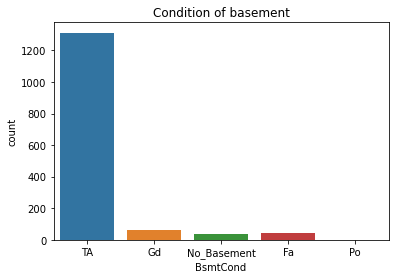

In [16]:
## Checking Basement counts
sns.countplot(x='BsmtCond', data=H_data)
plt.title('Condition of basement')

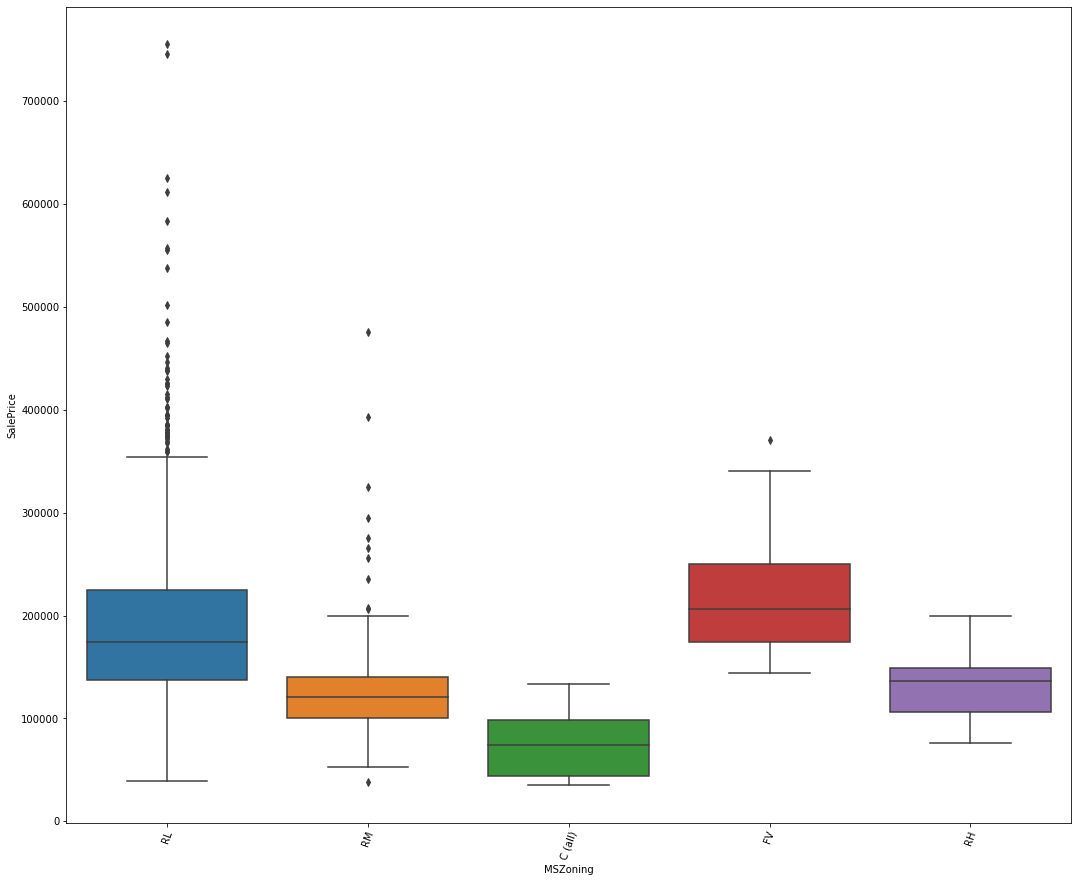

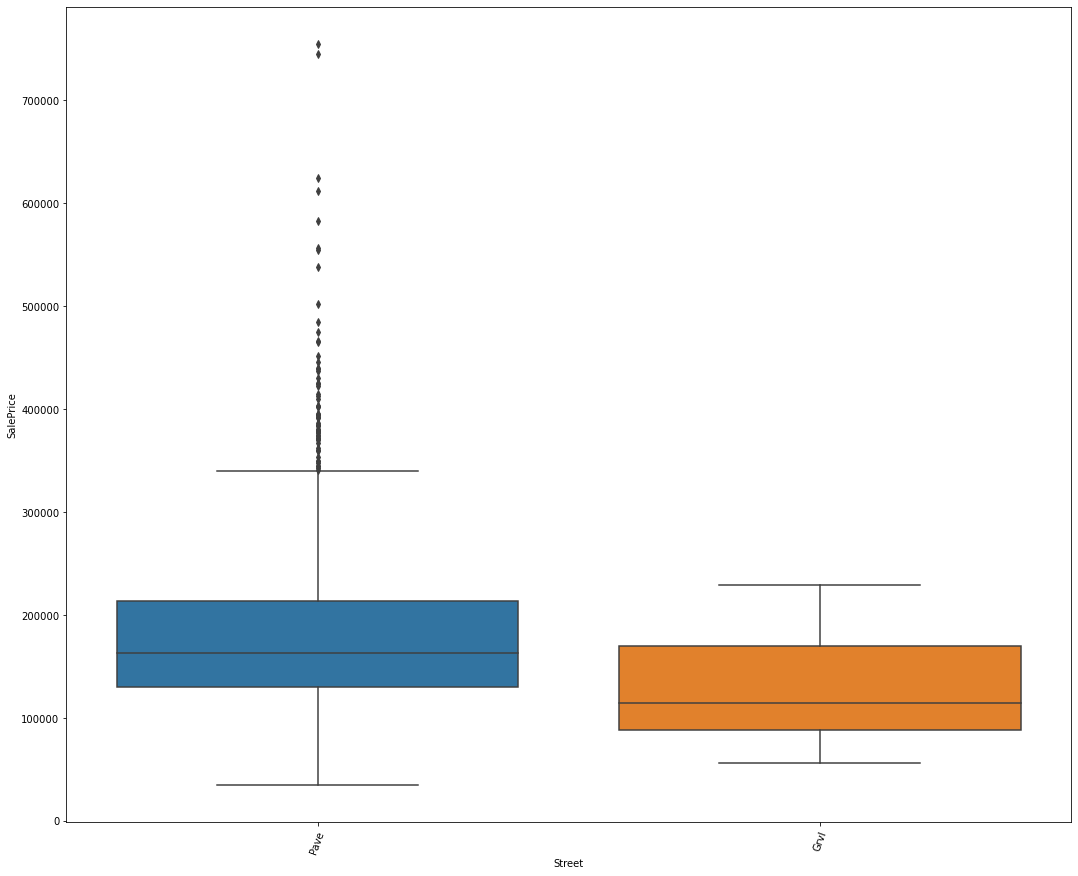

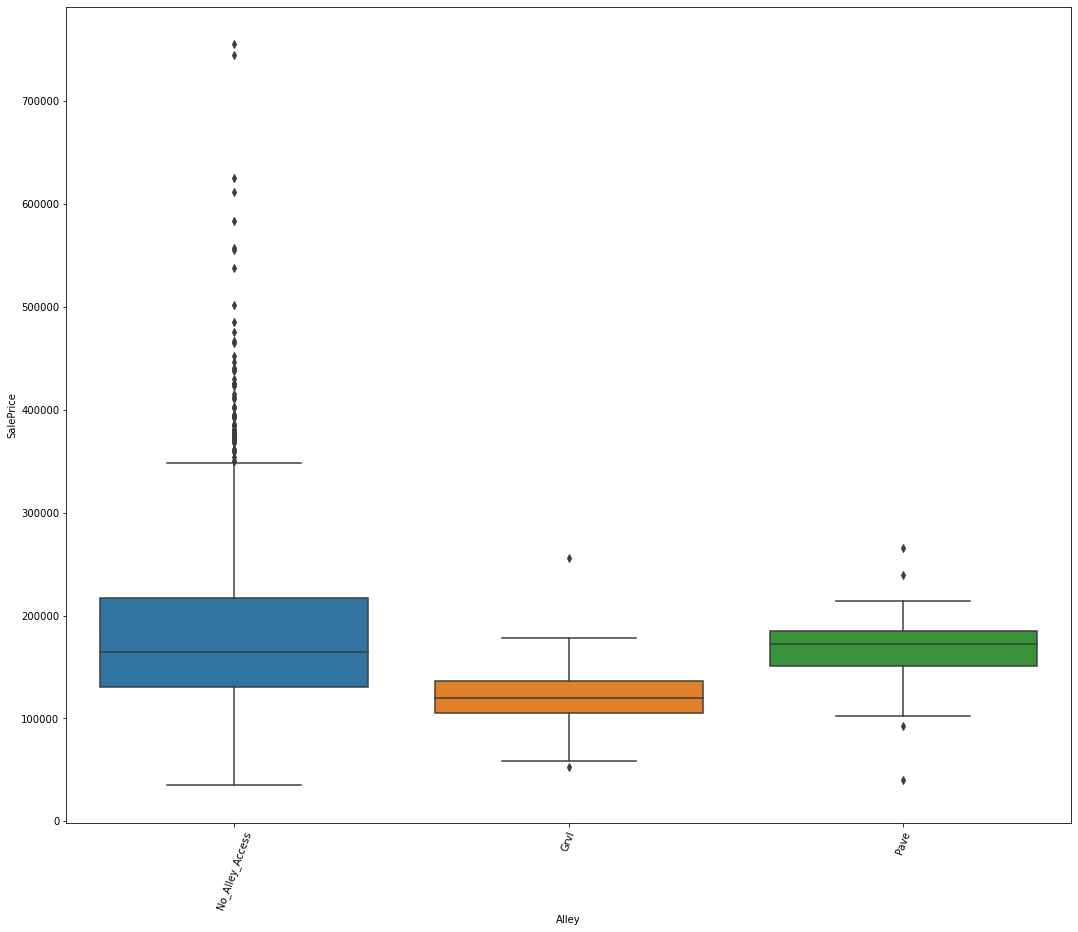

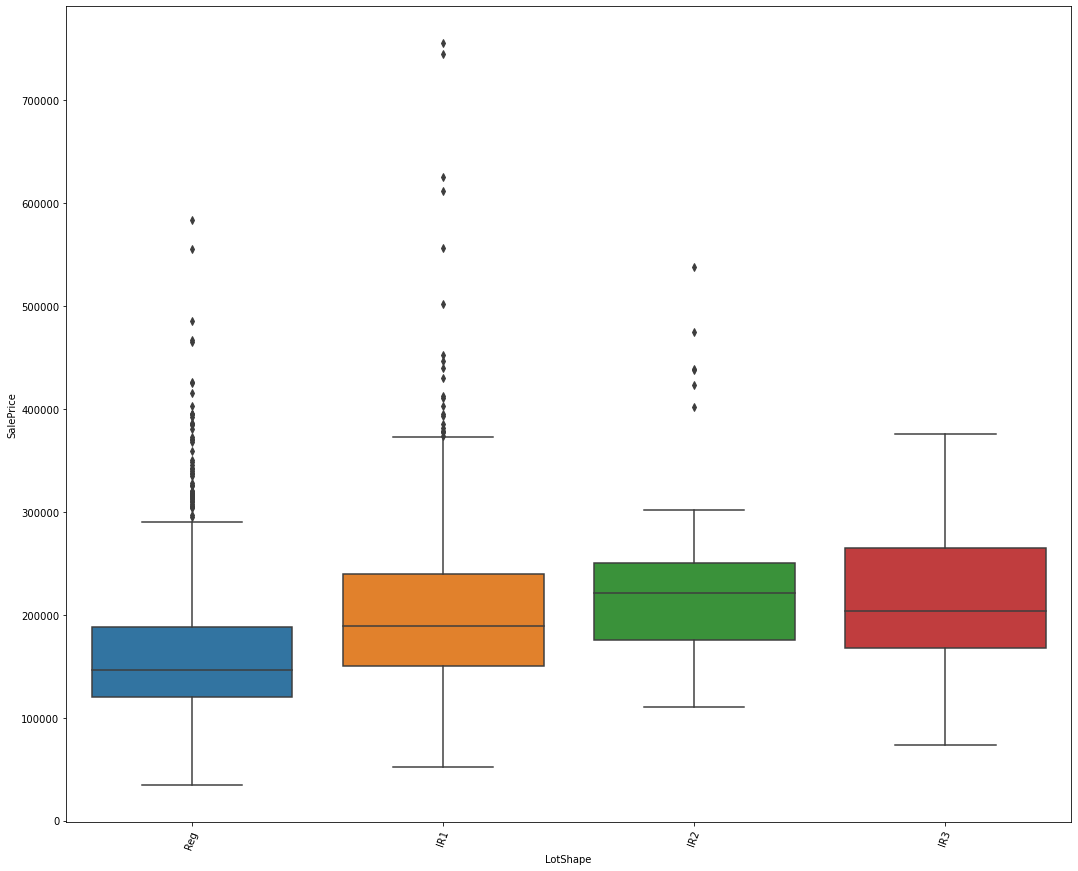

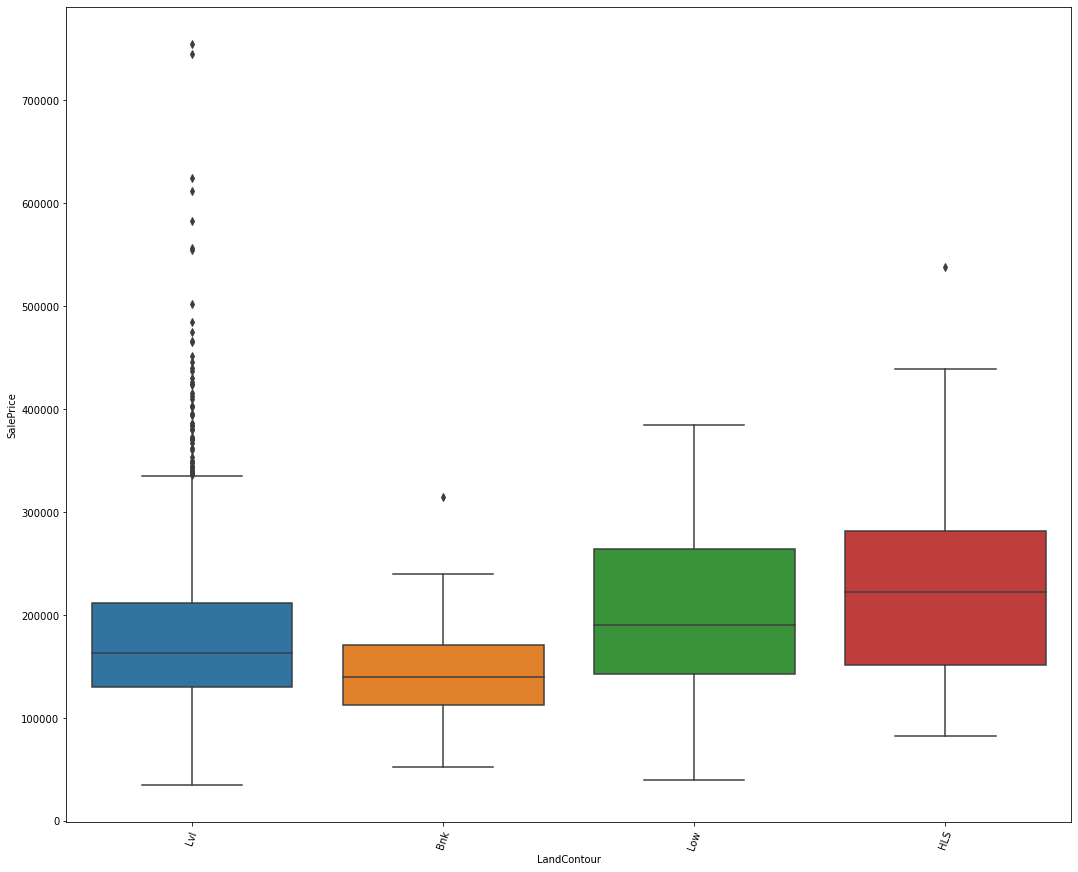

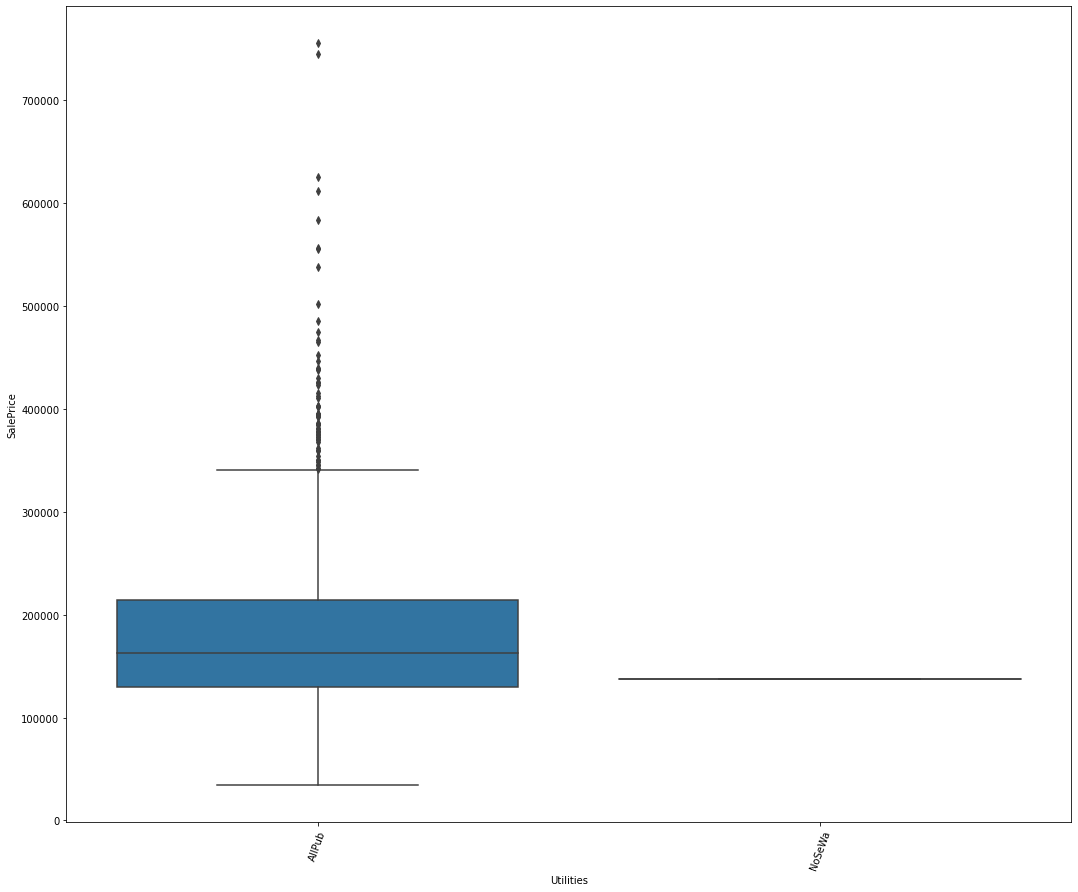

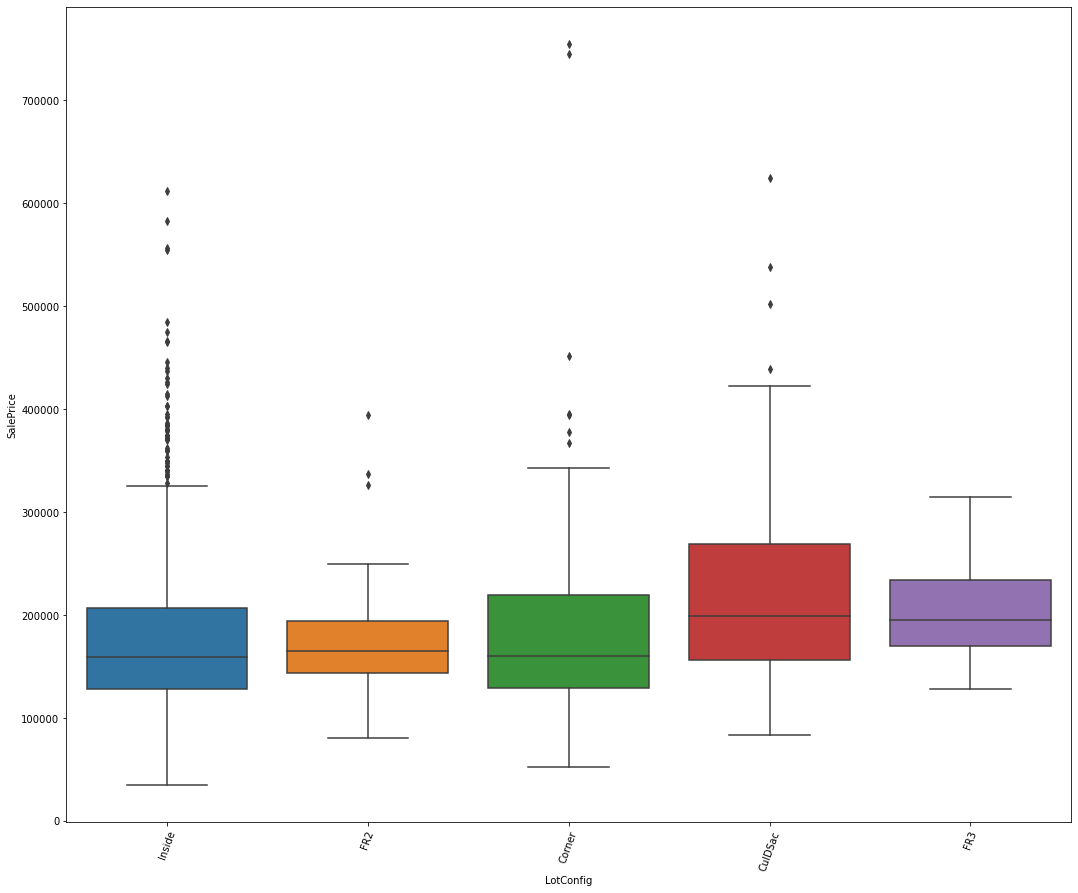

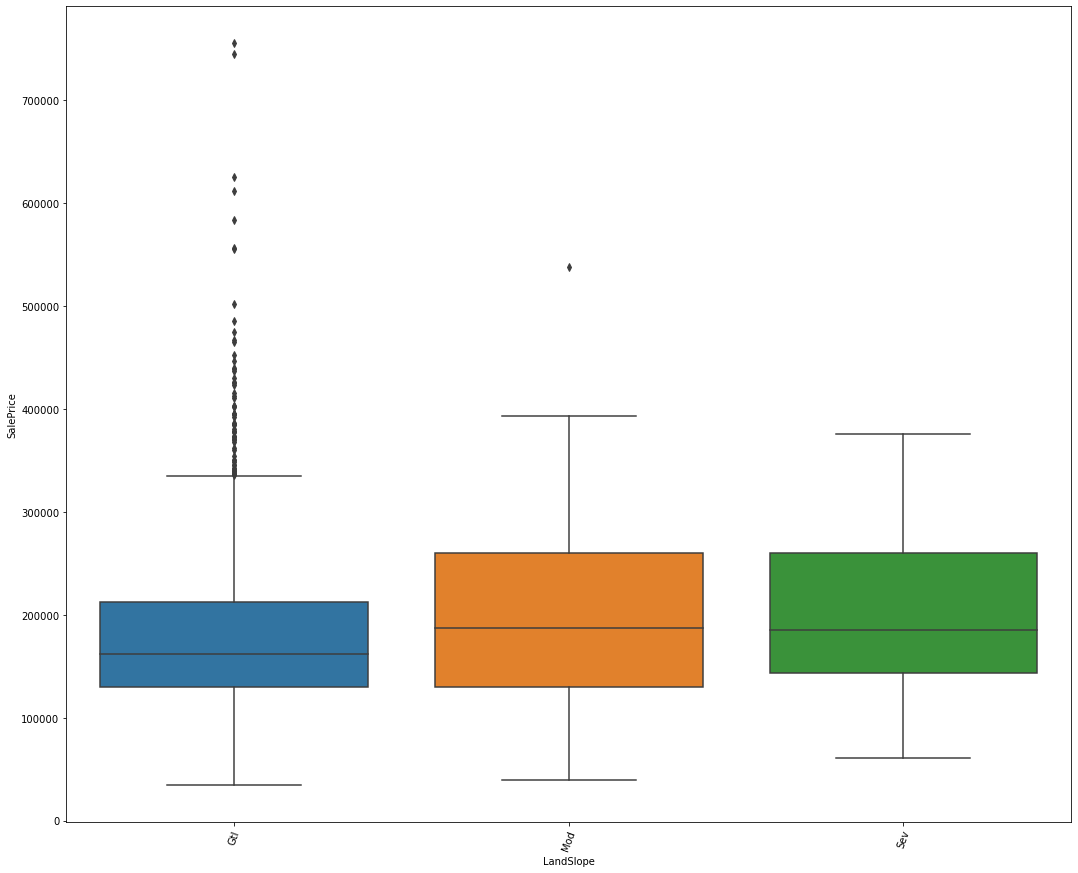

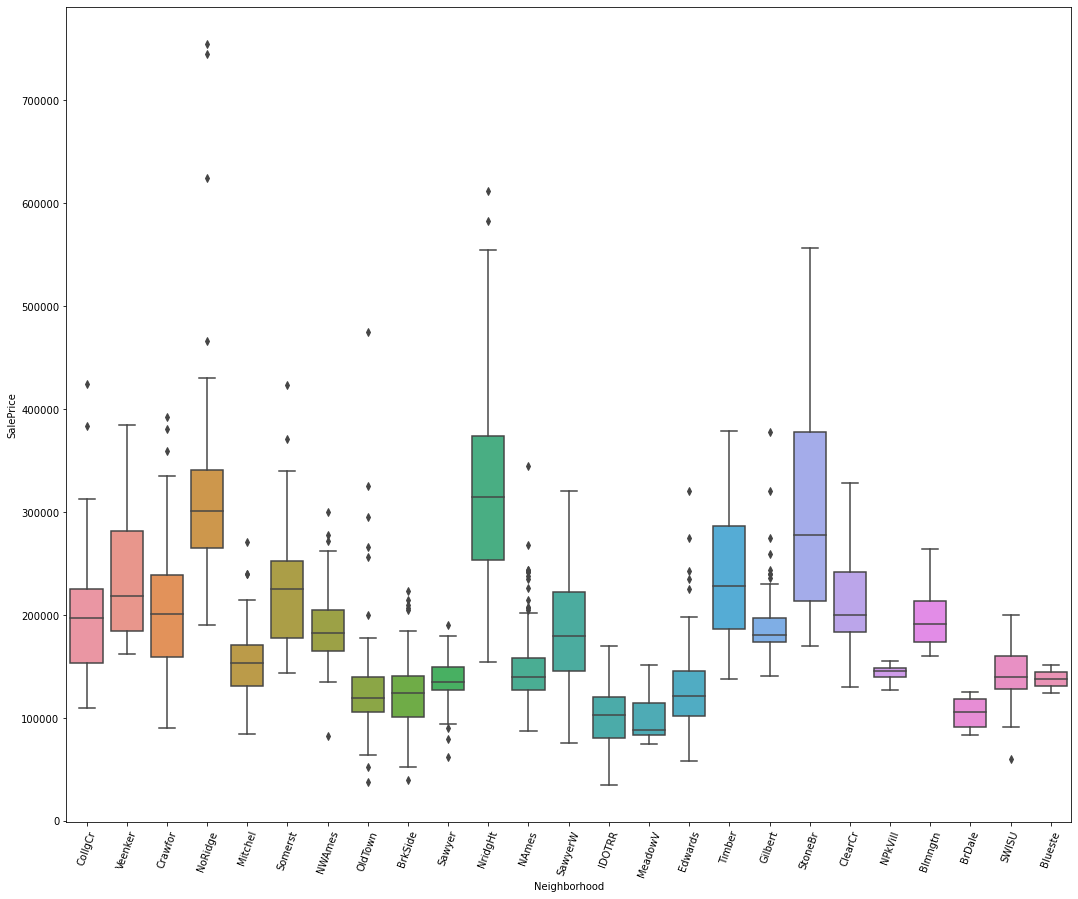

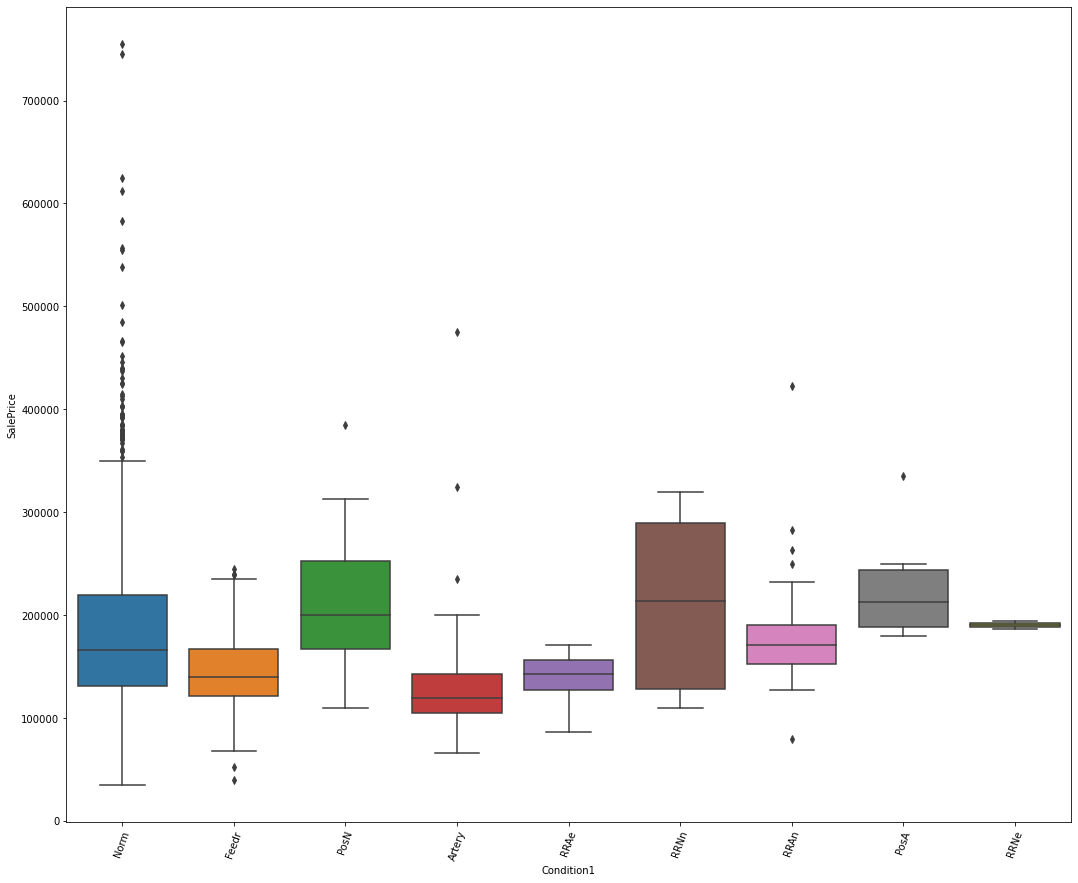

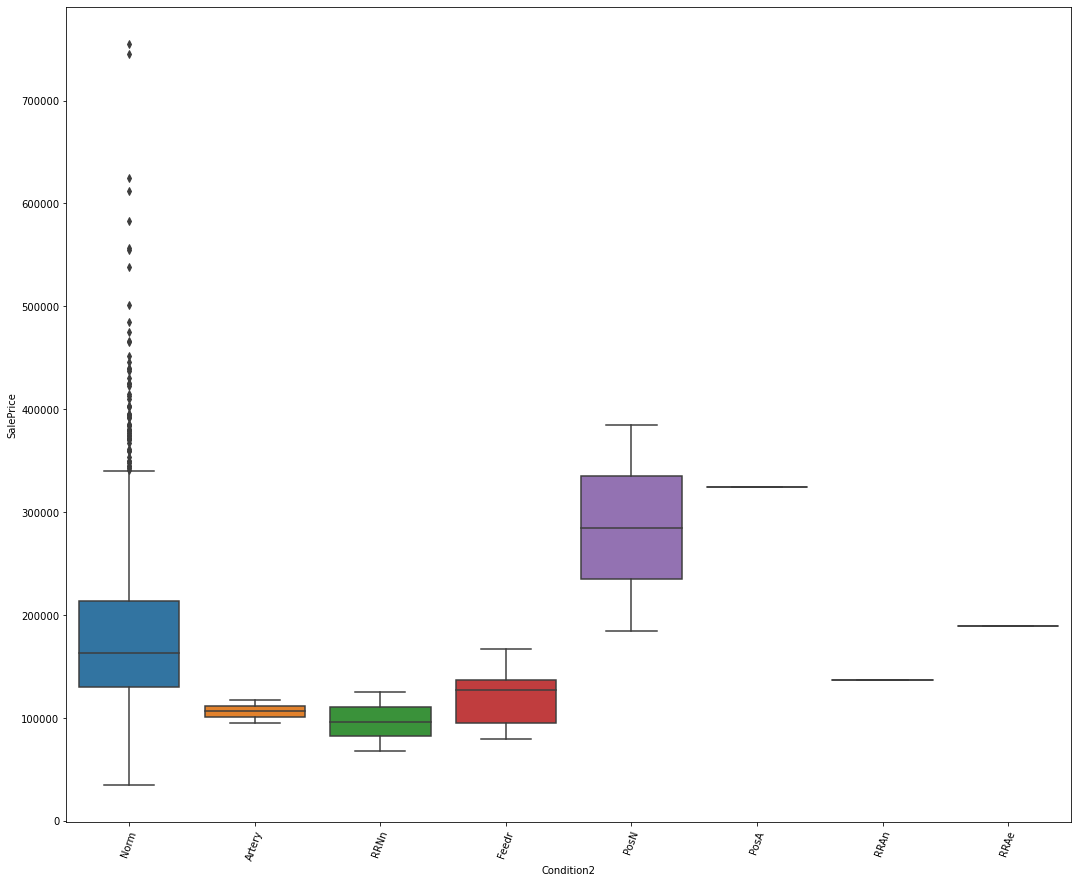

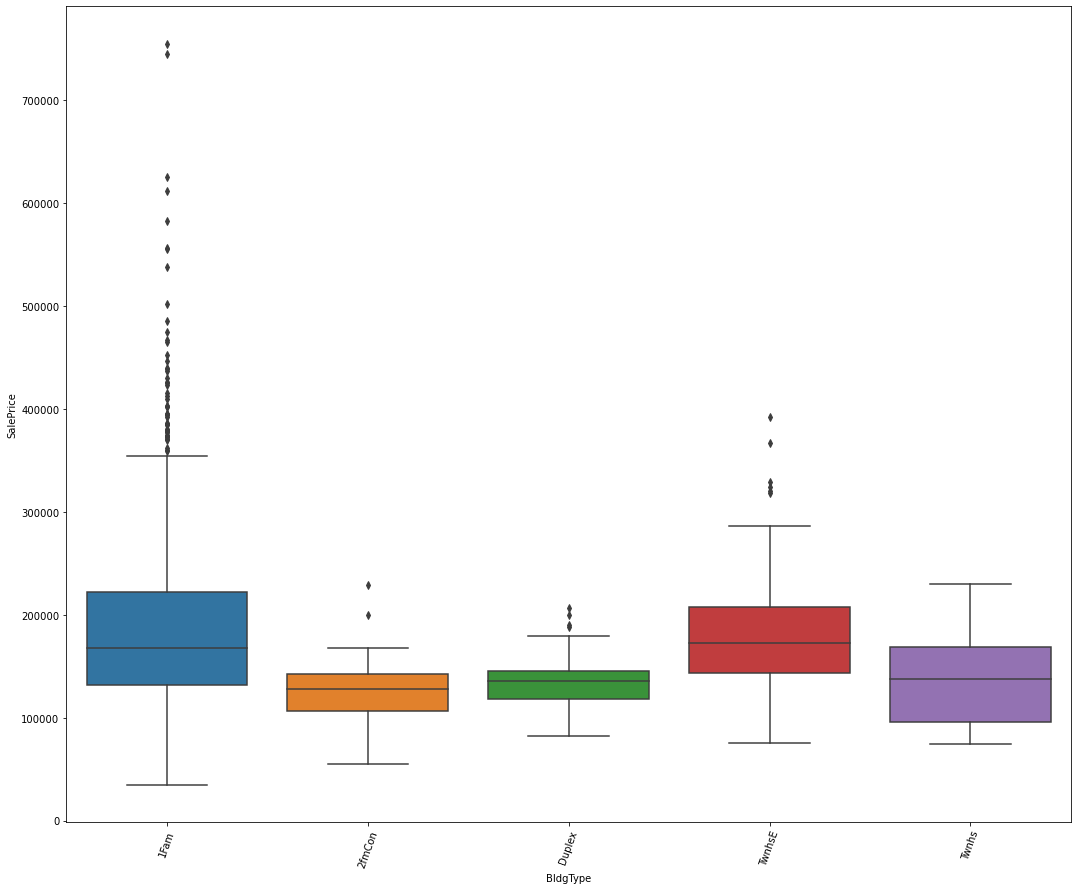

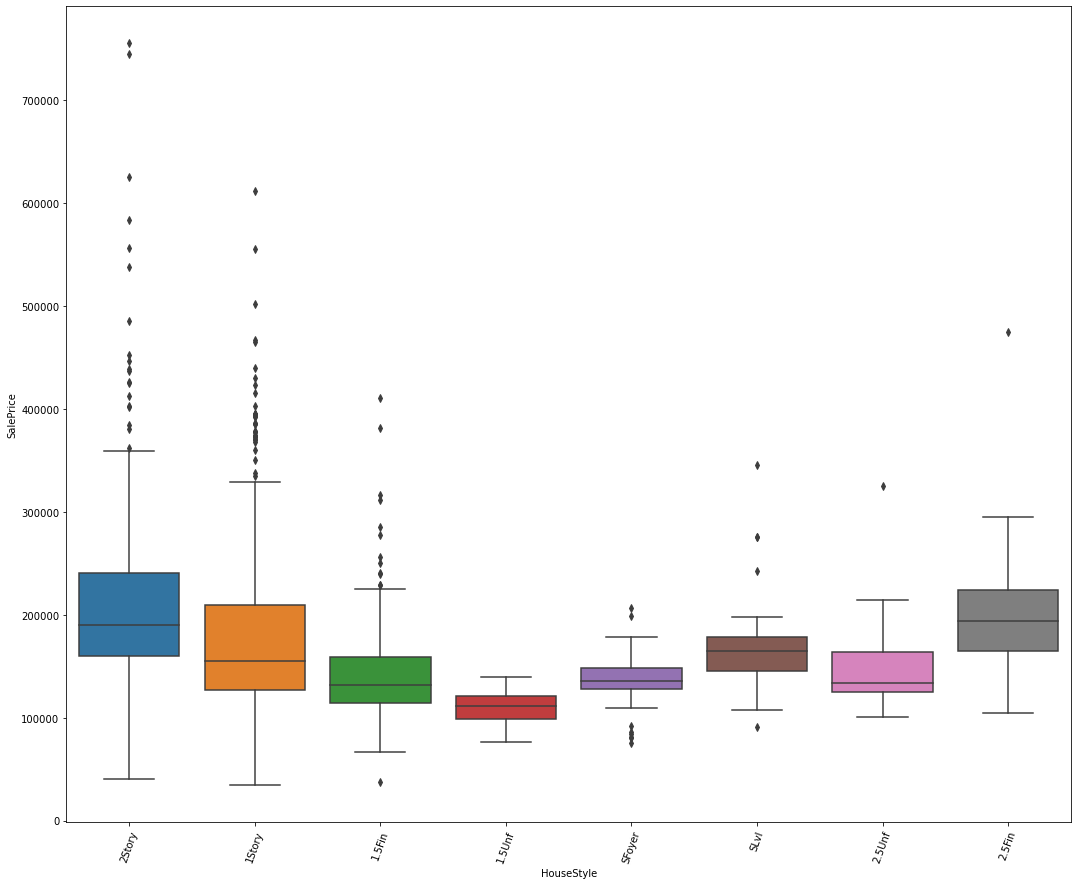

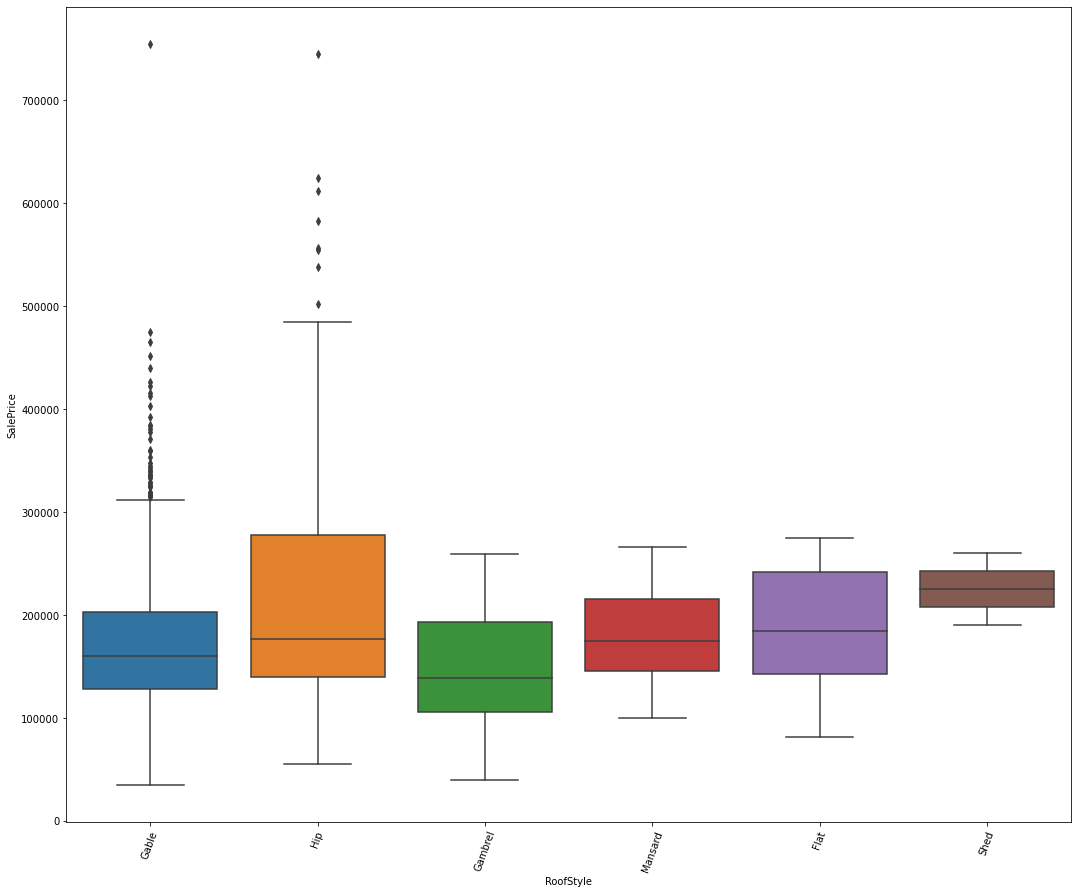

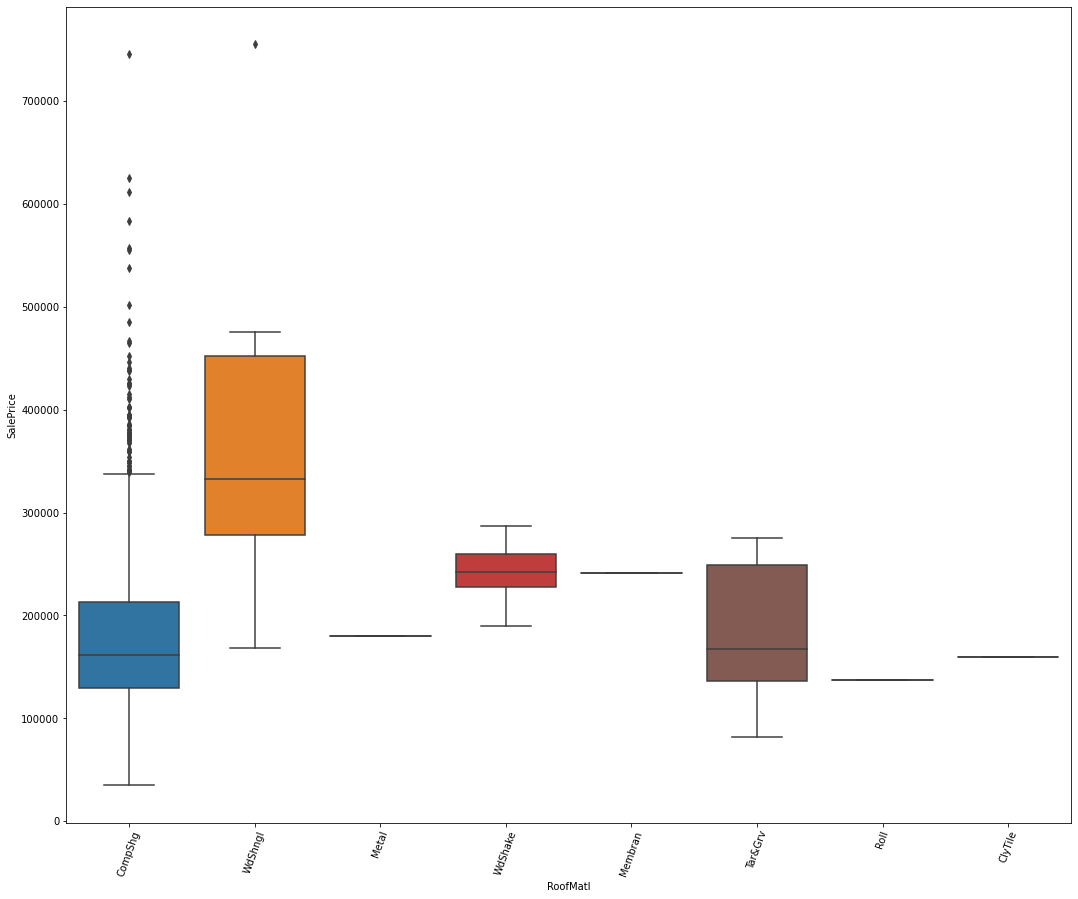

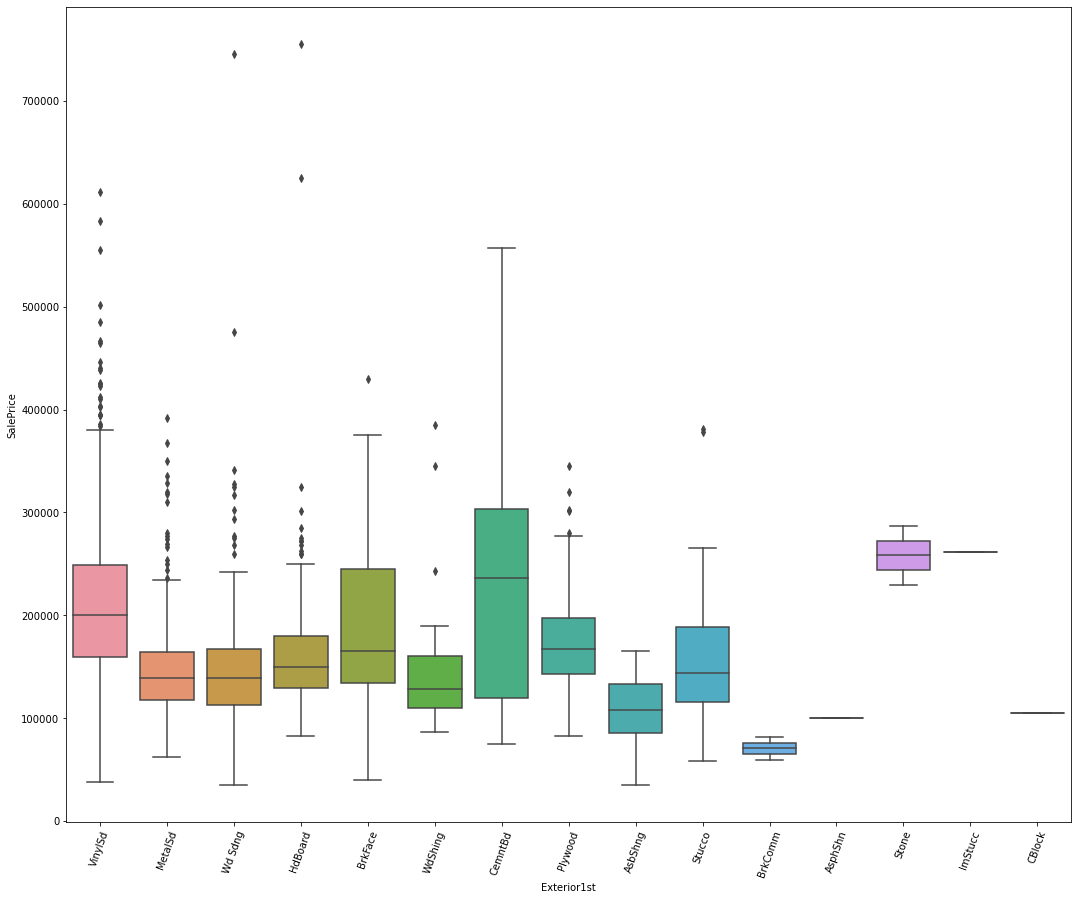

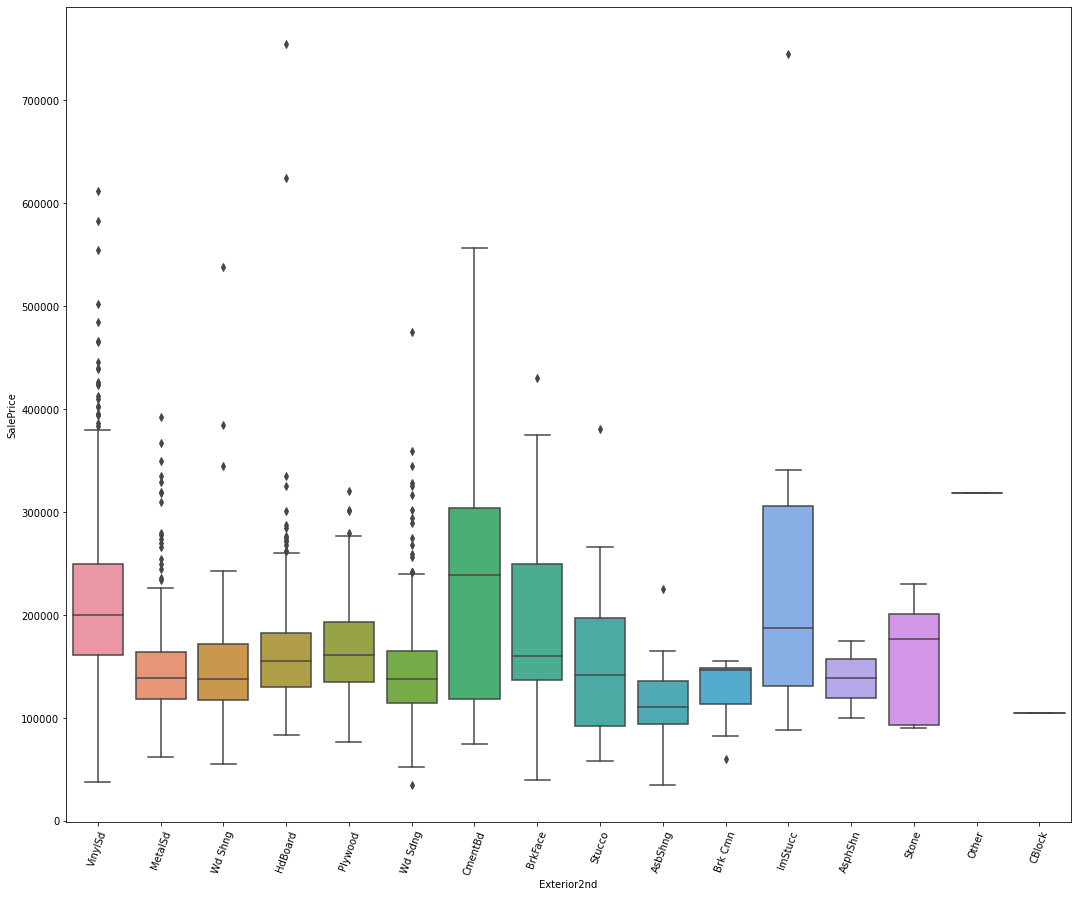

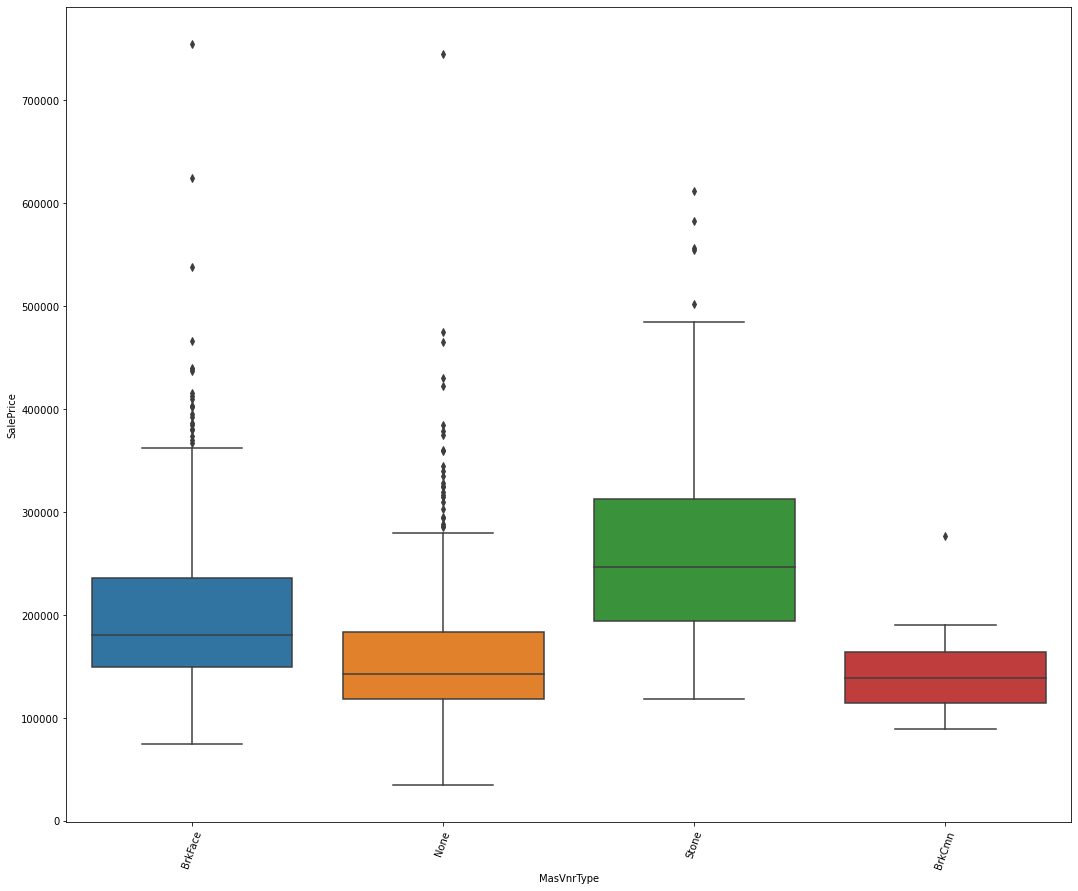

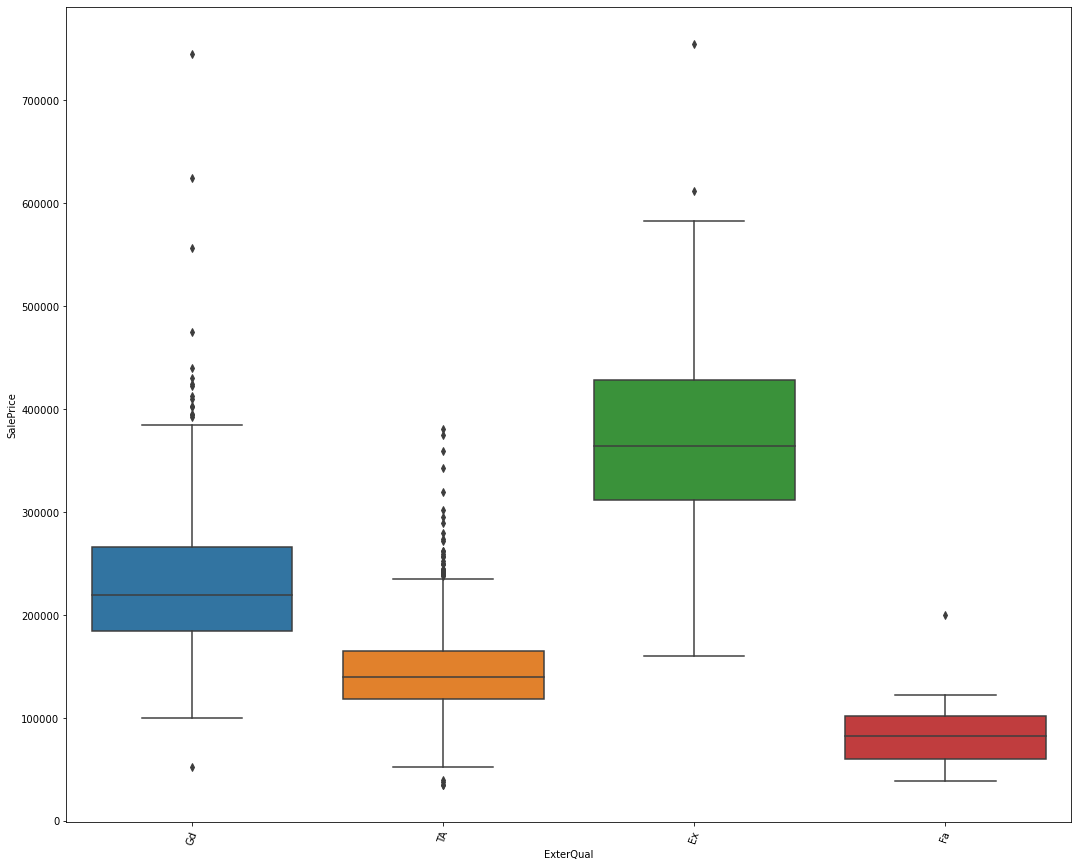

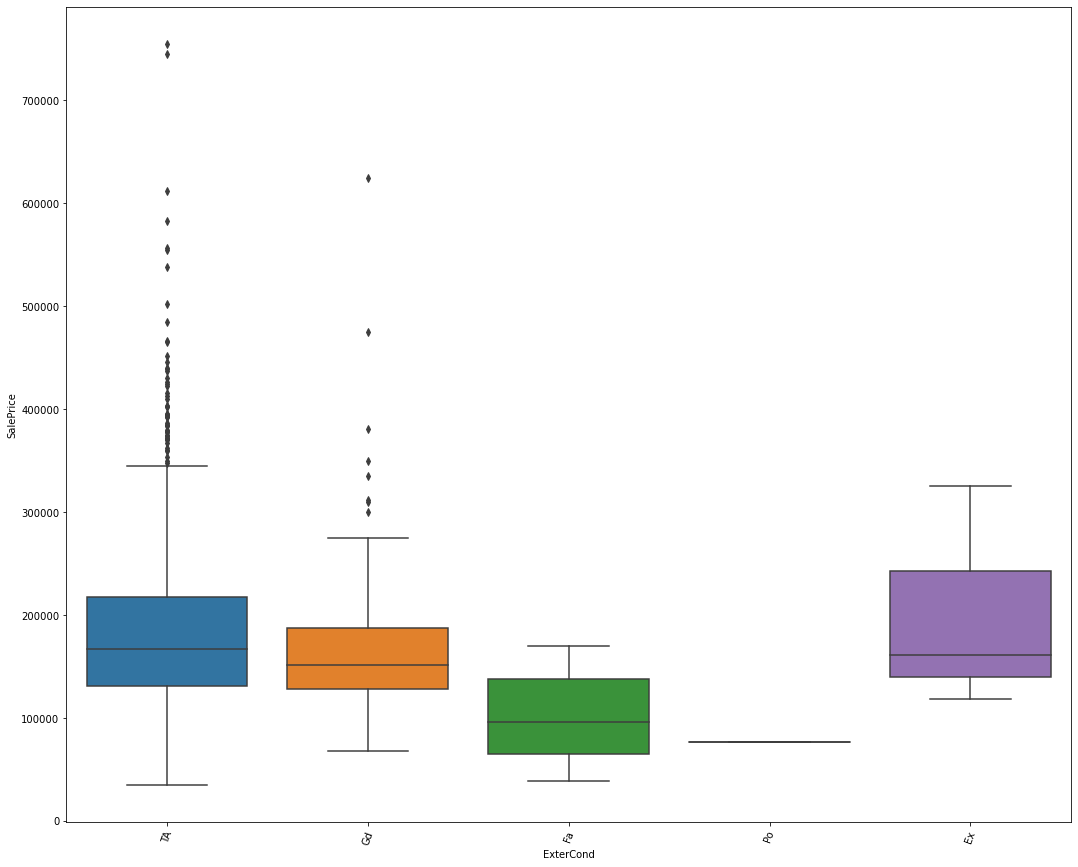

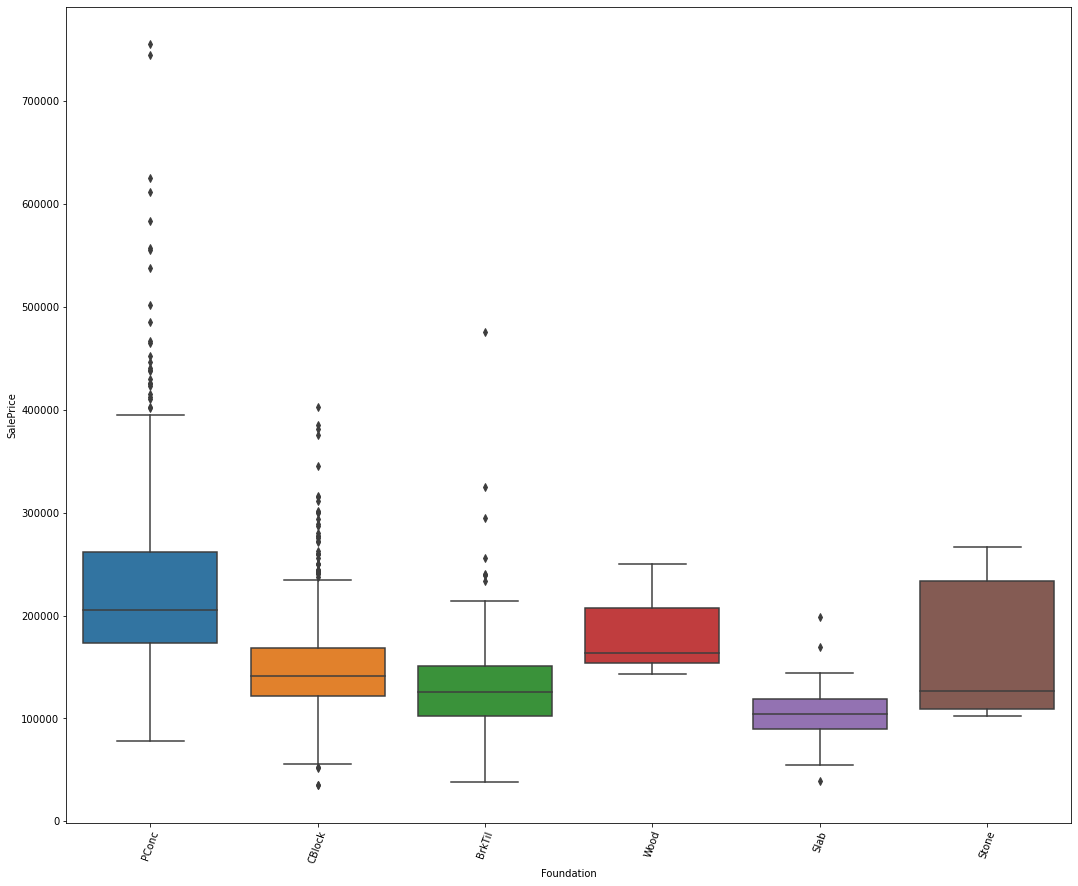

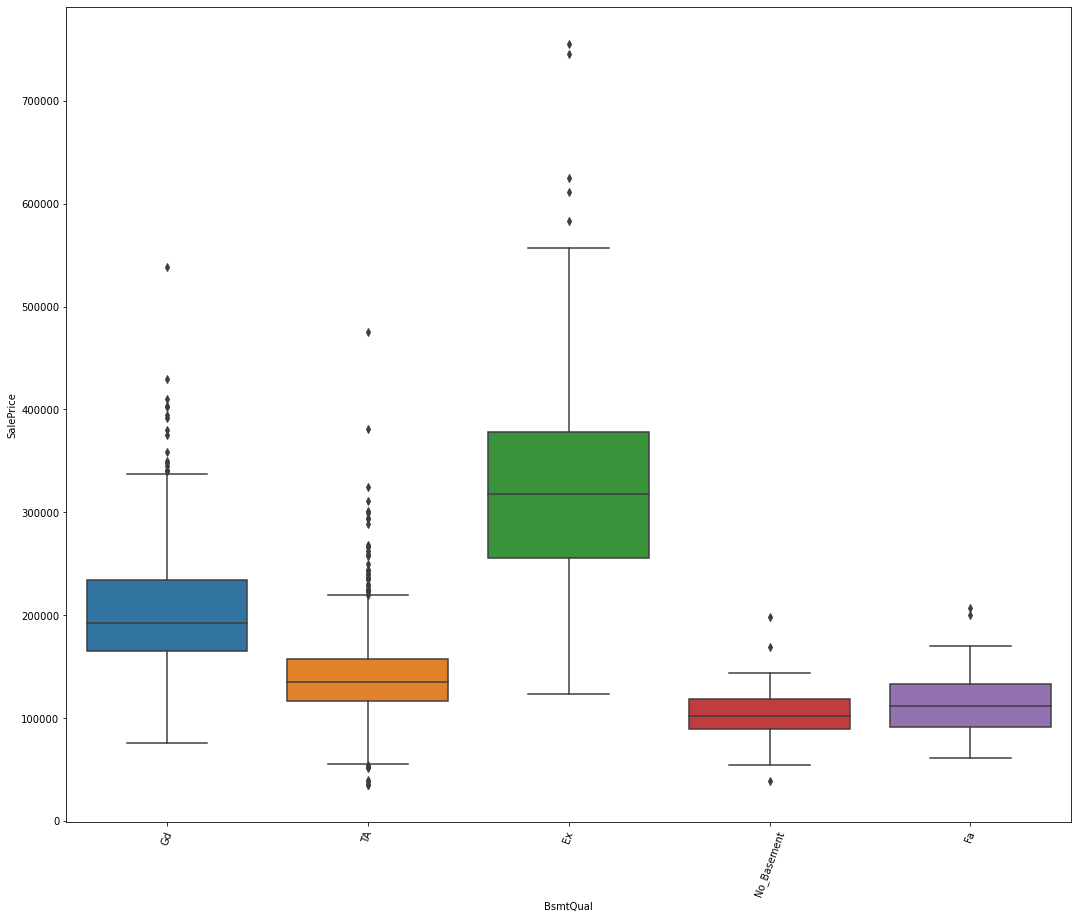

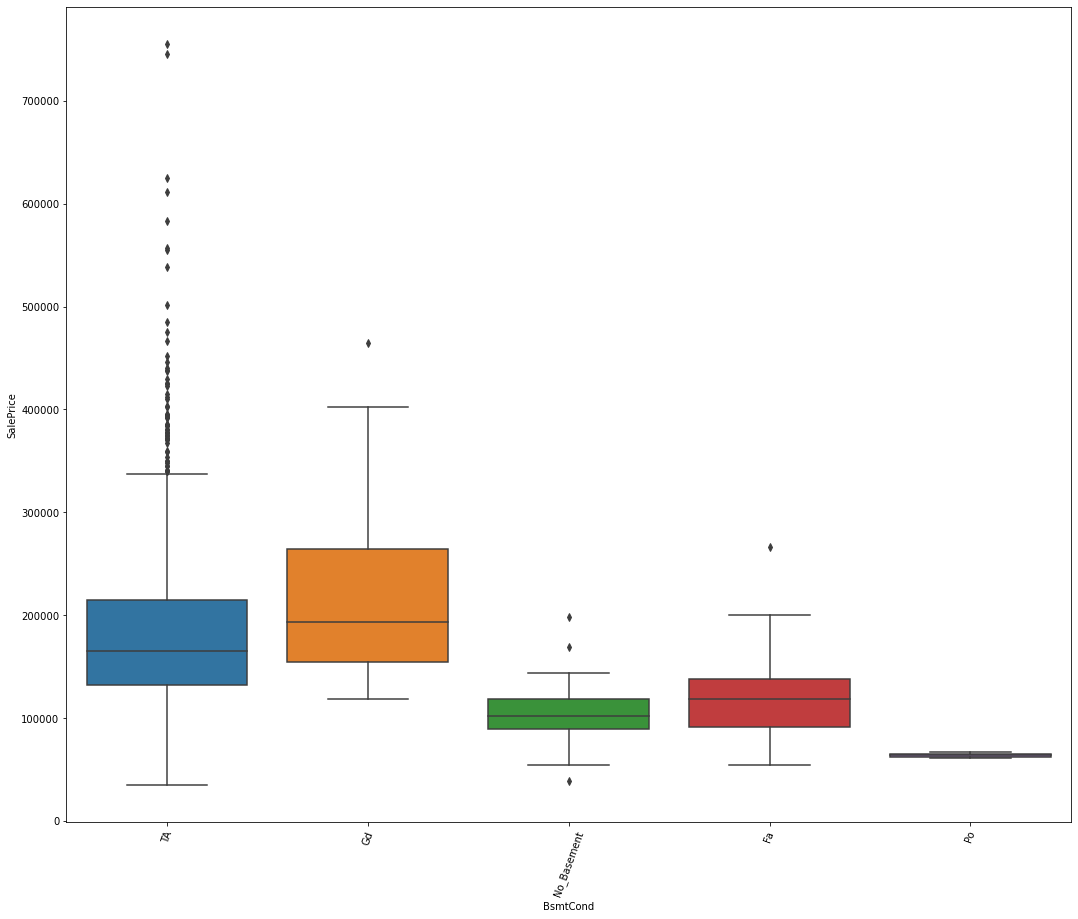

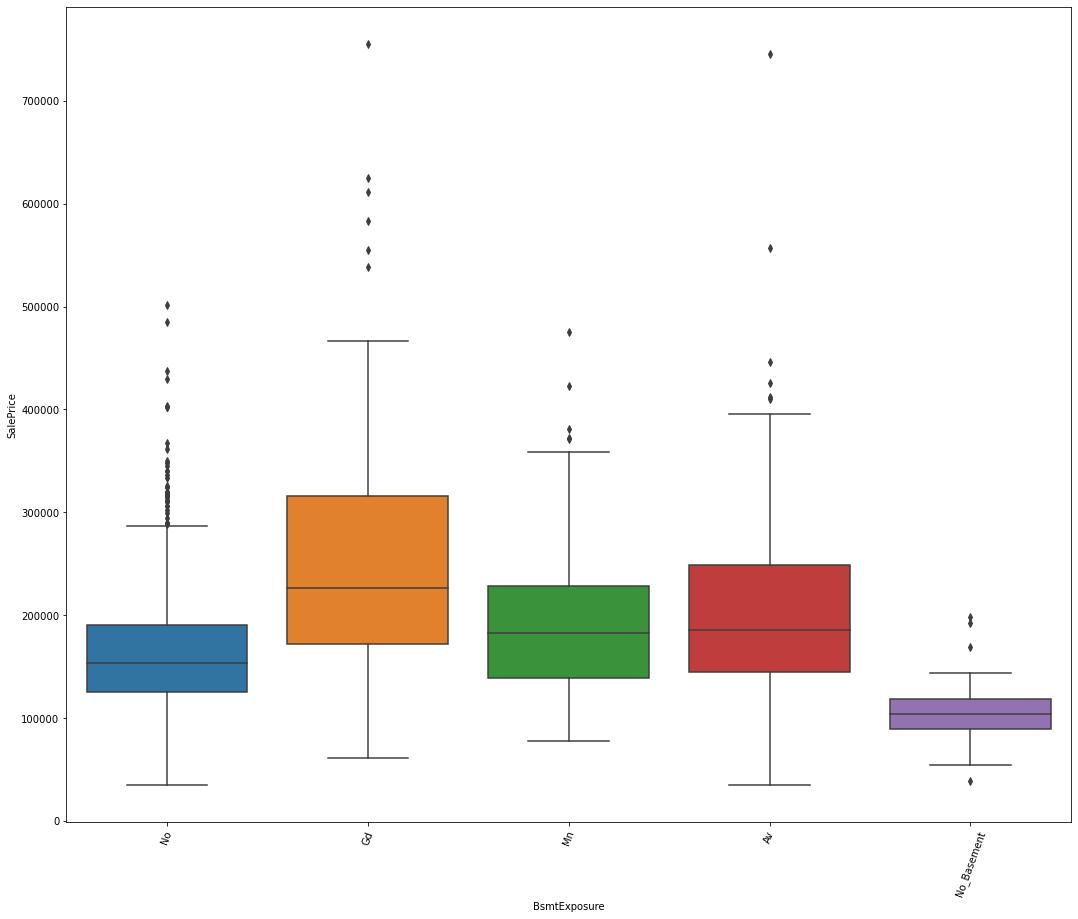

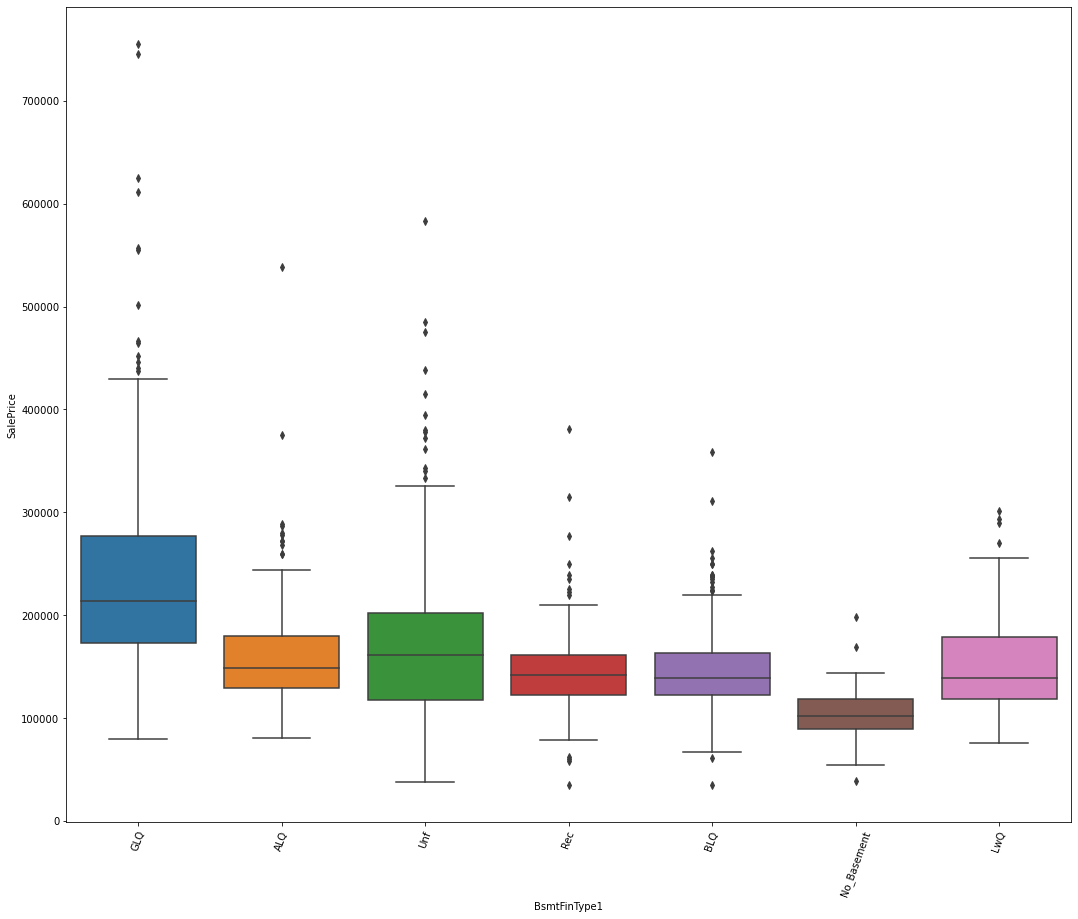

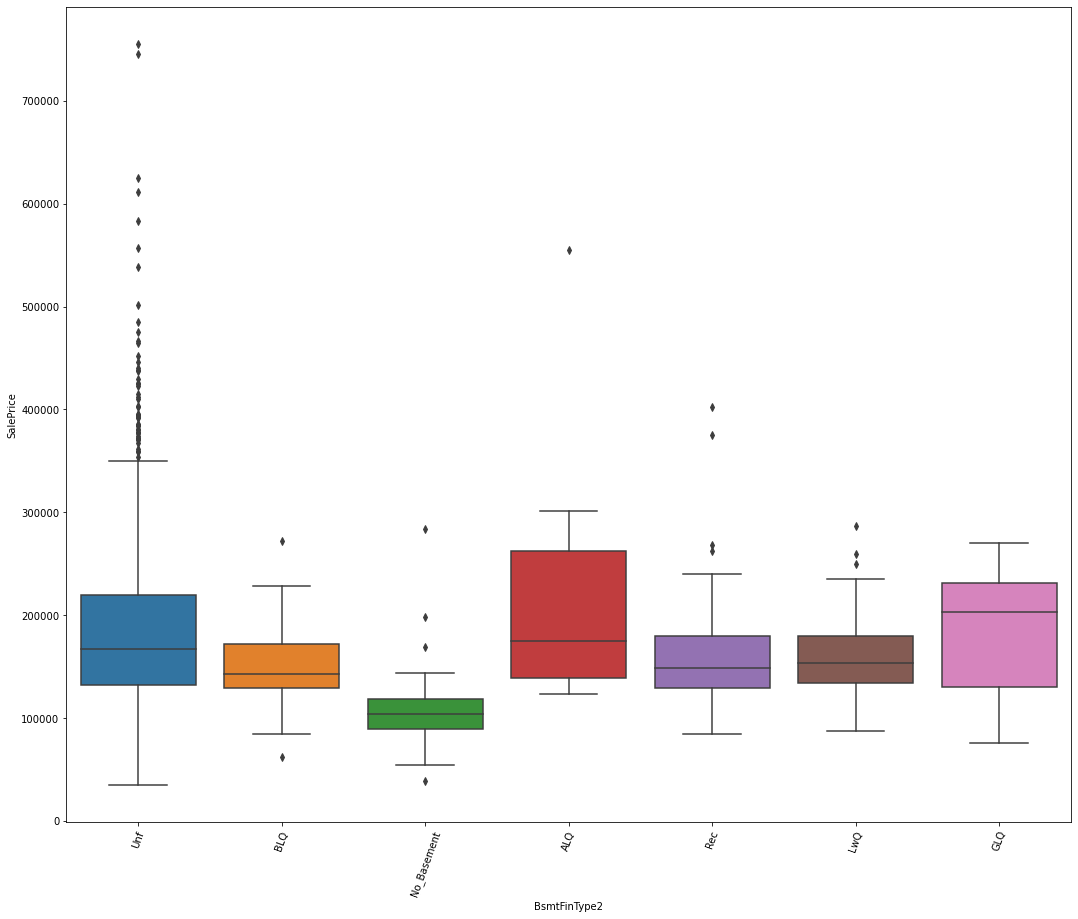

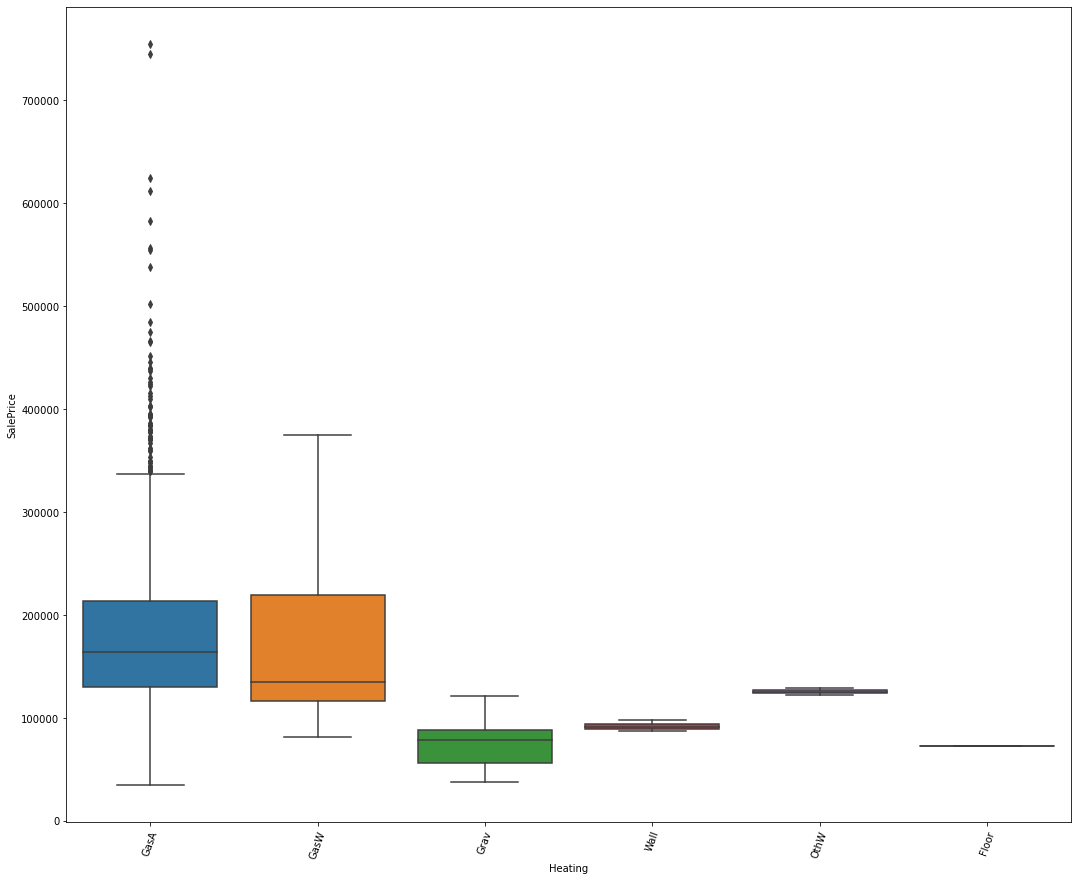

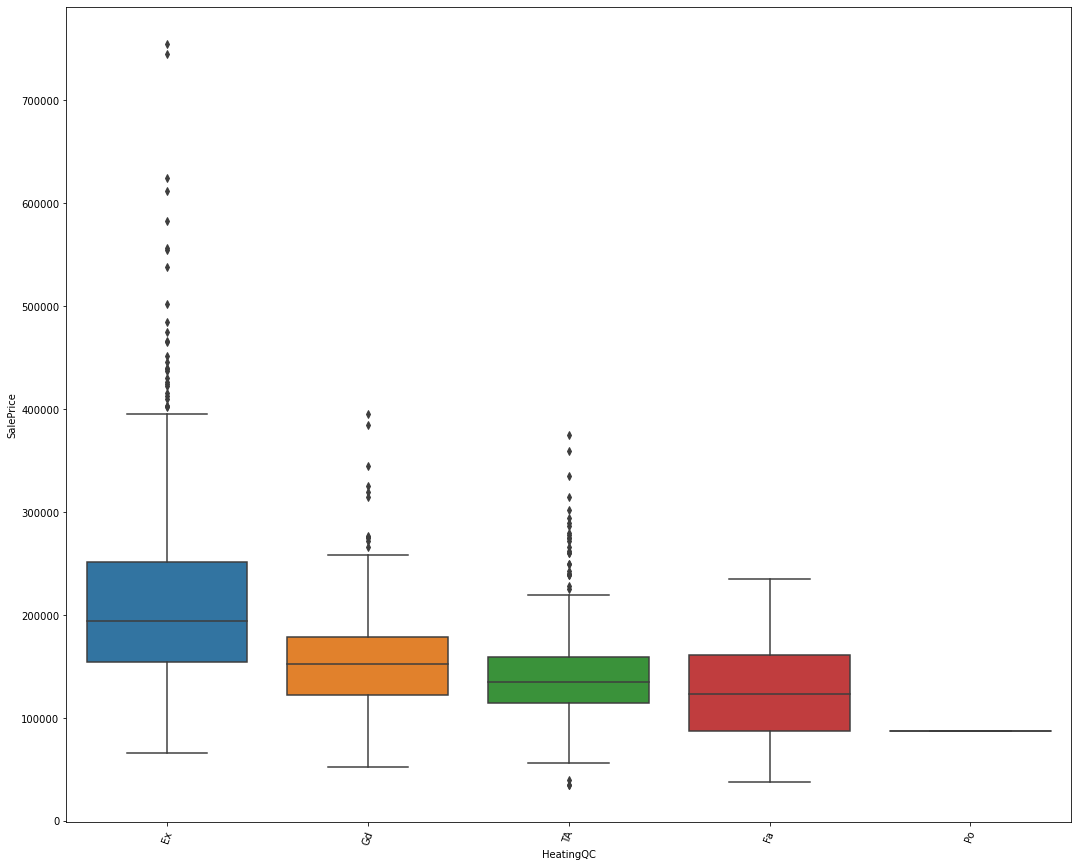

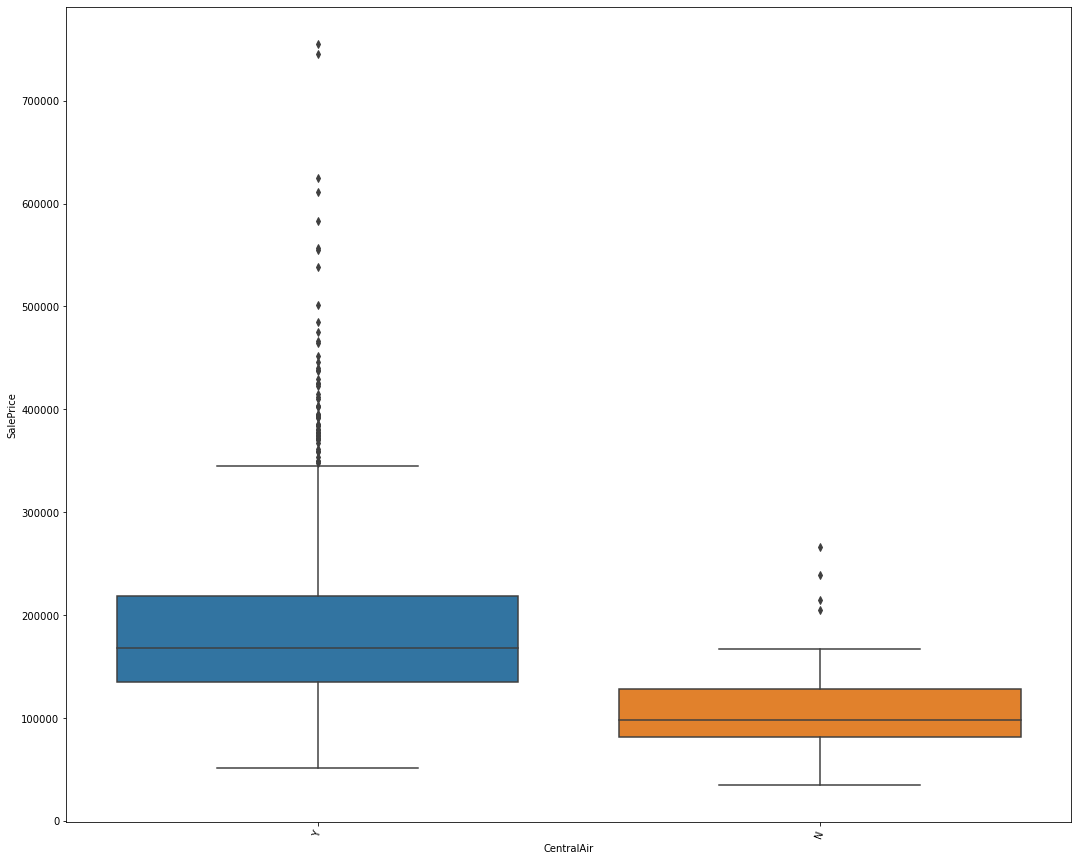

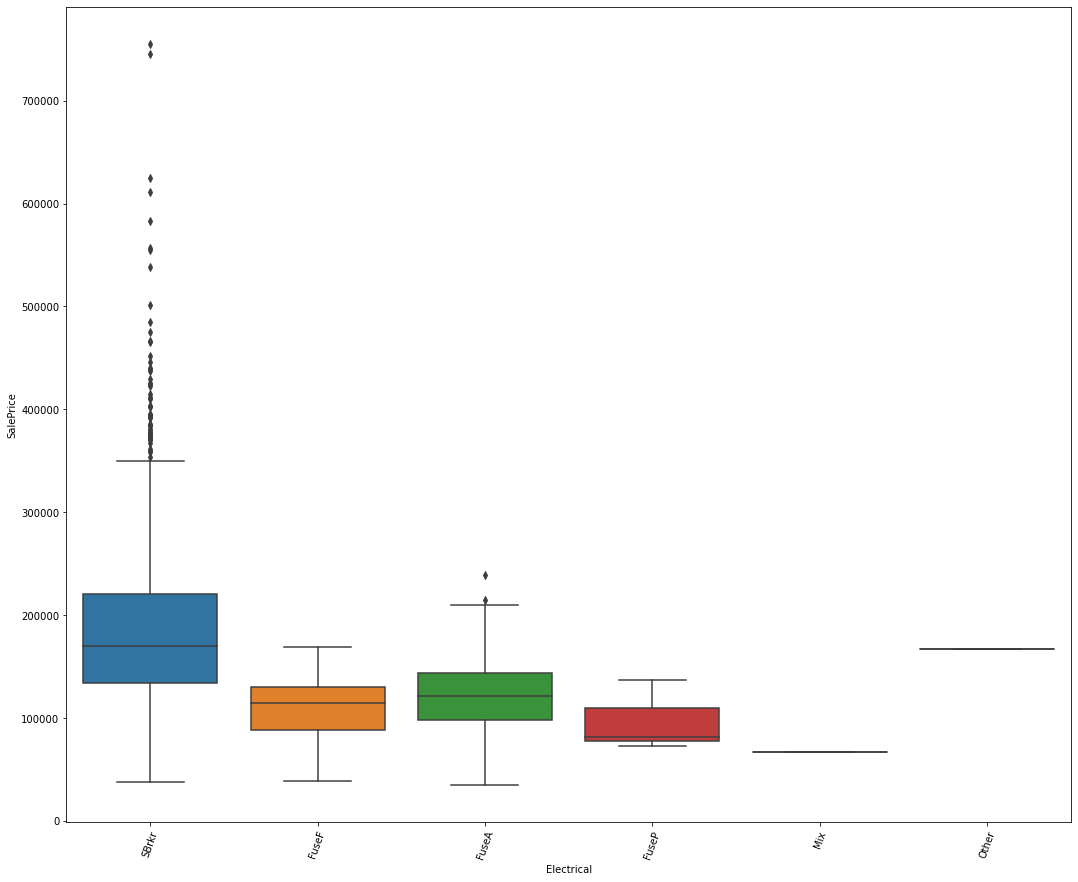

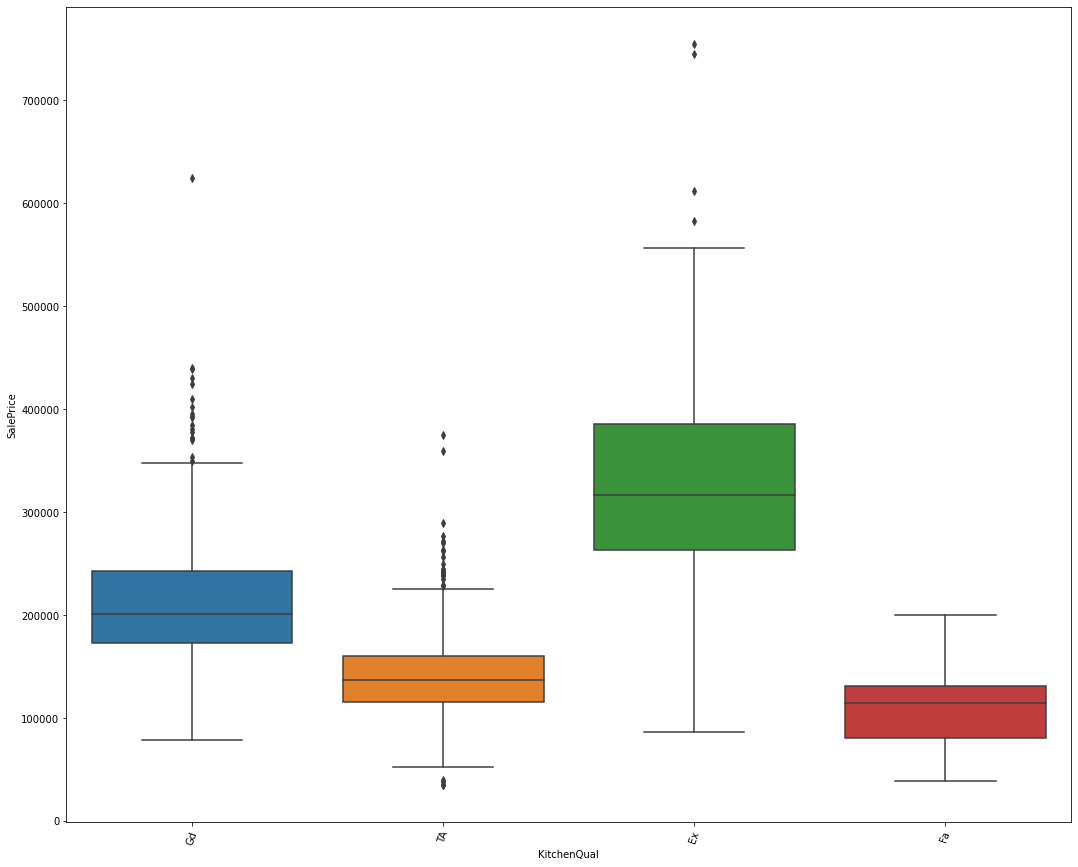

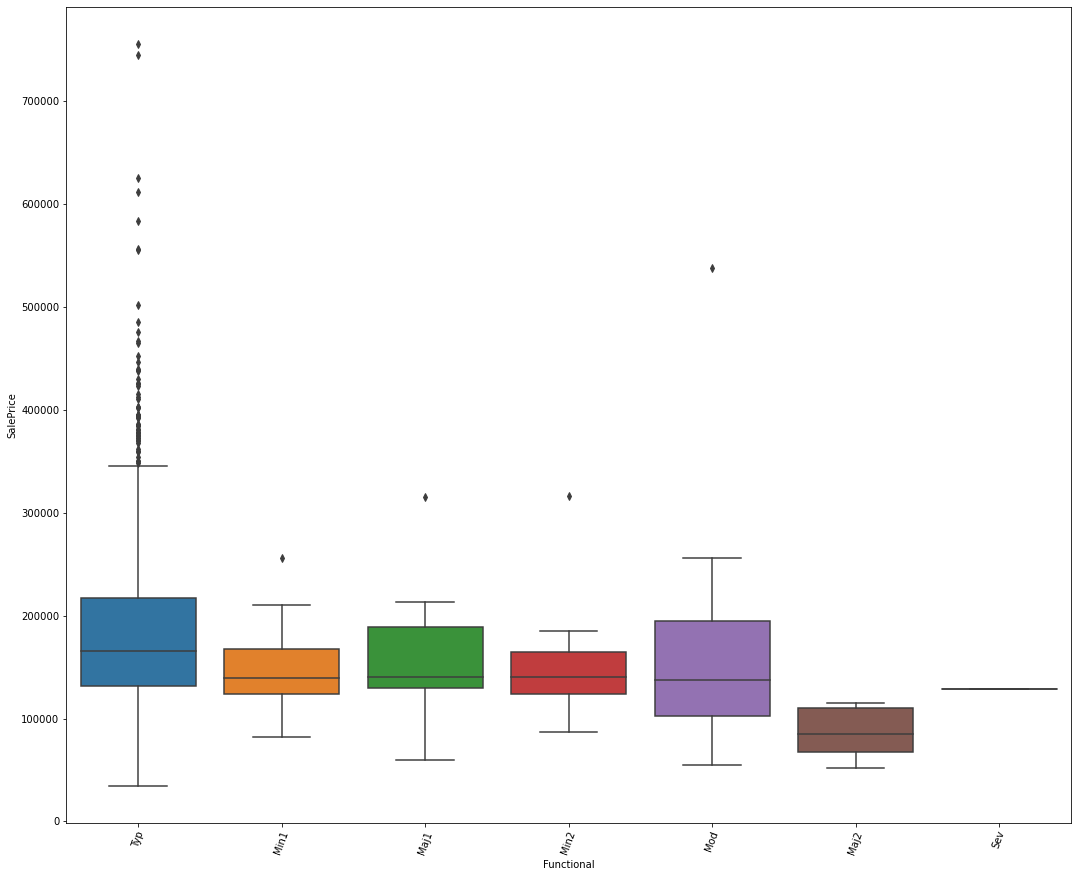

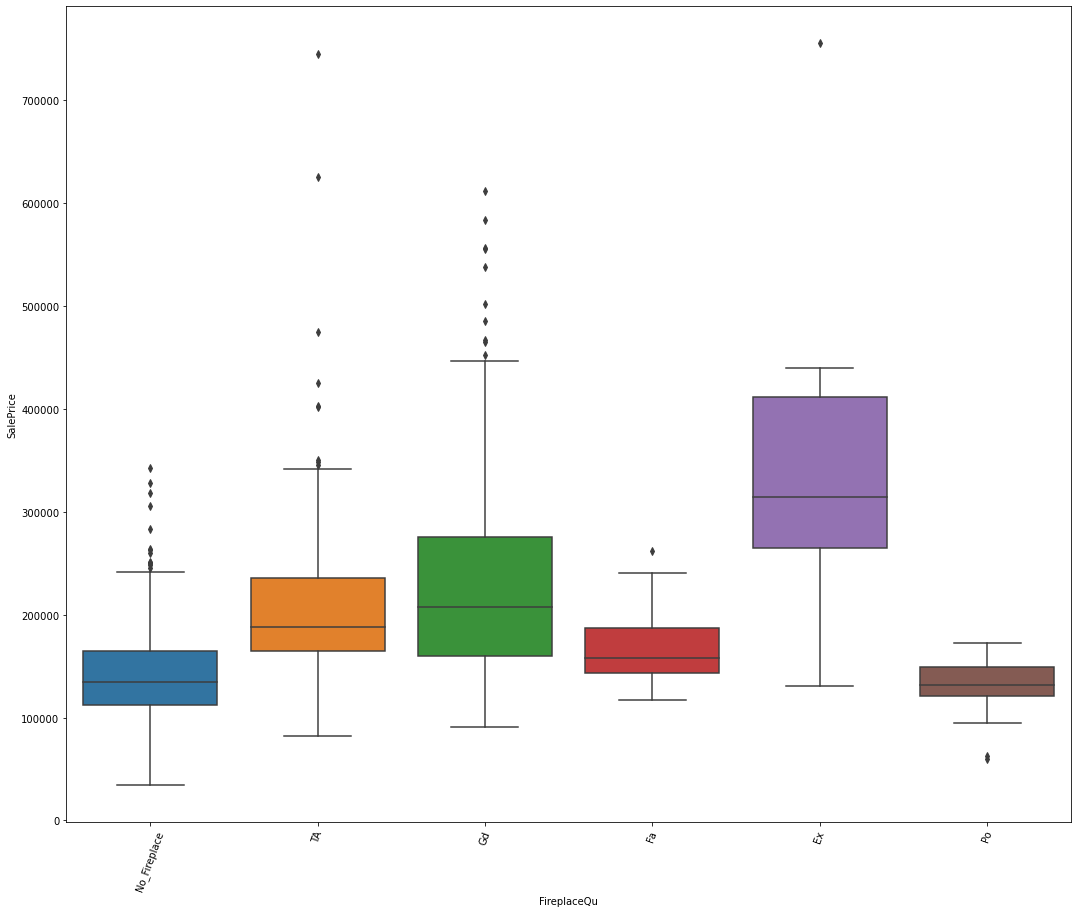

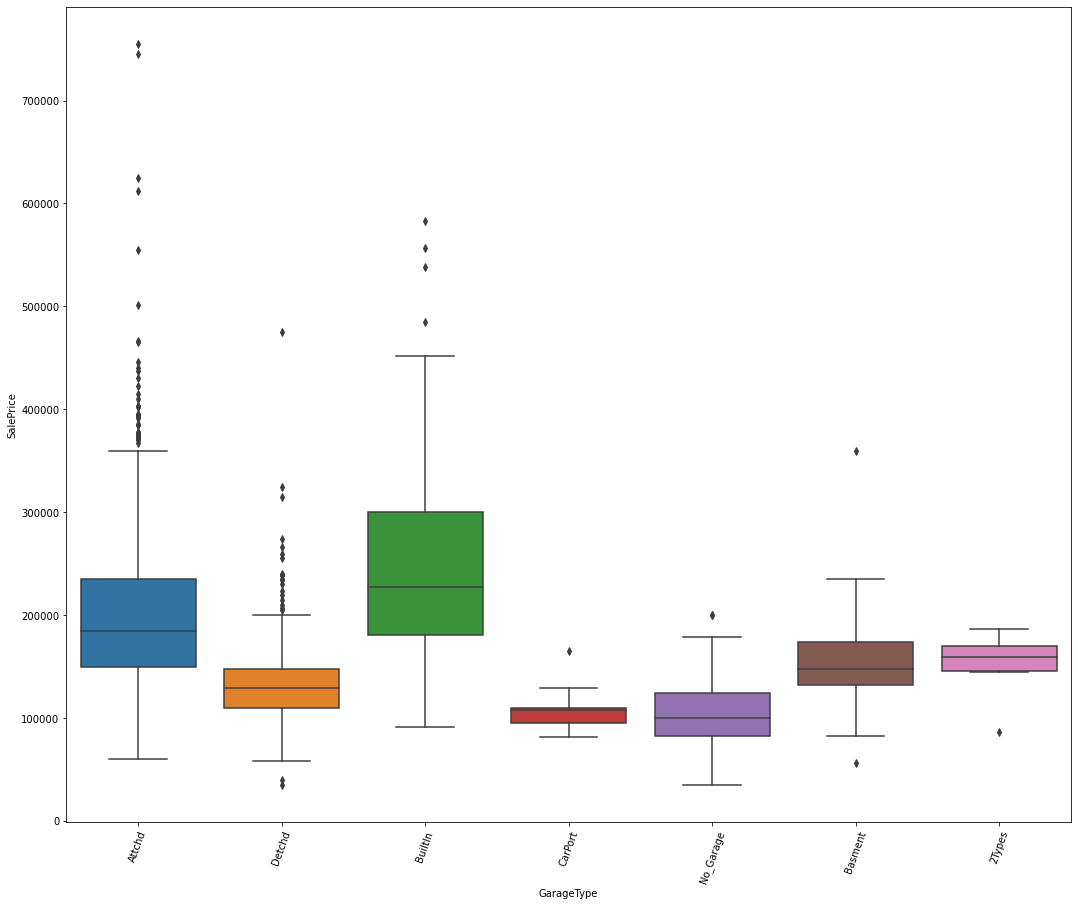

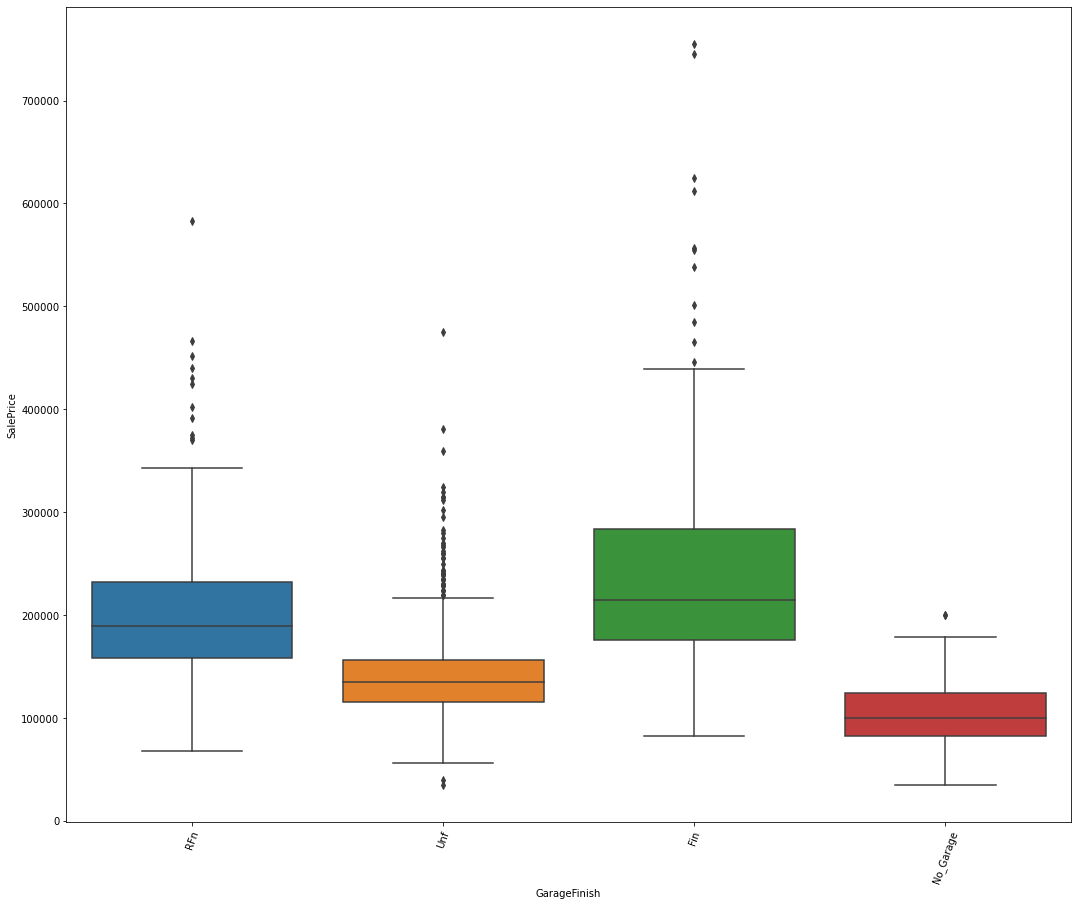

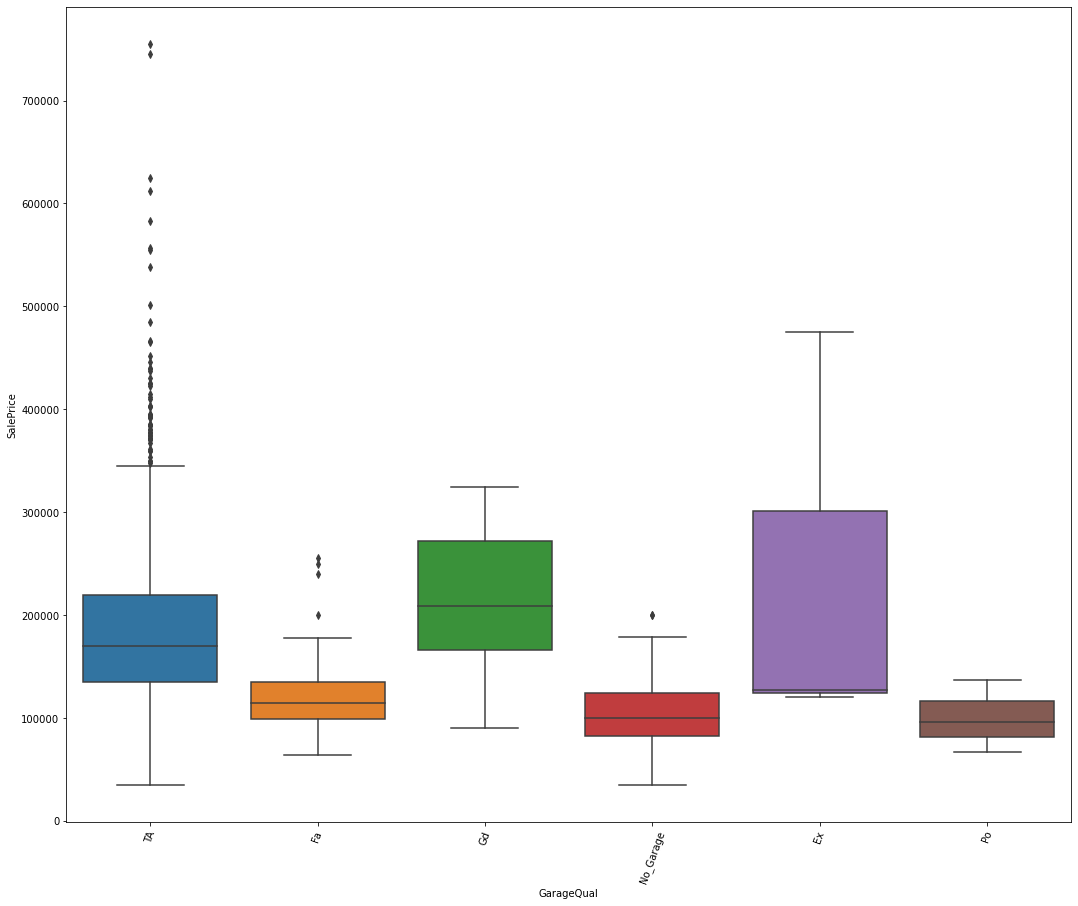

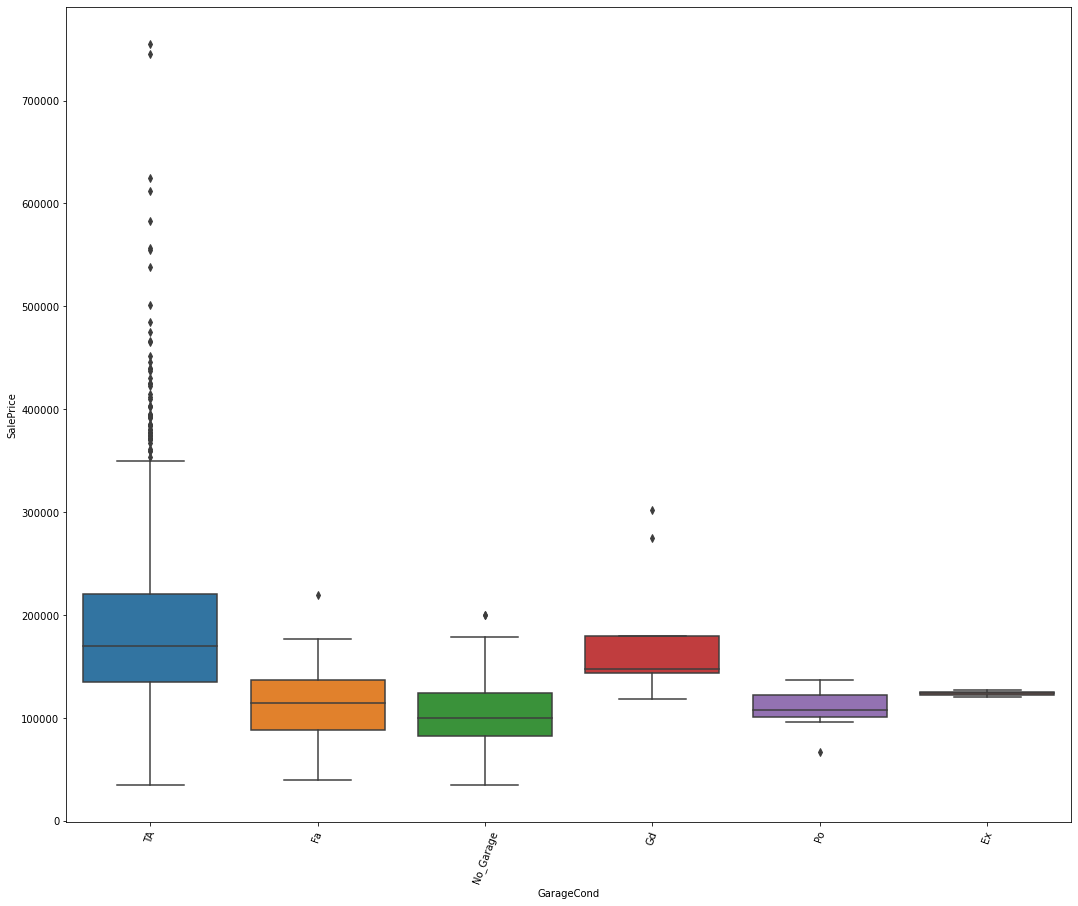

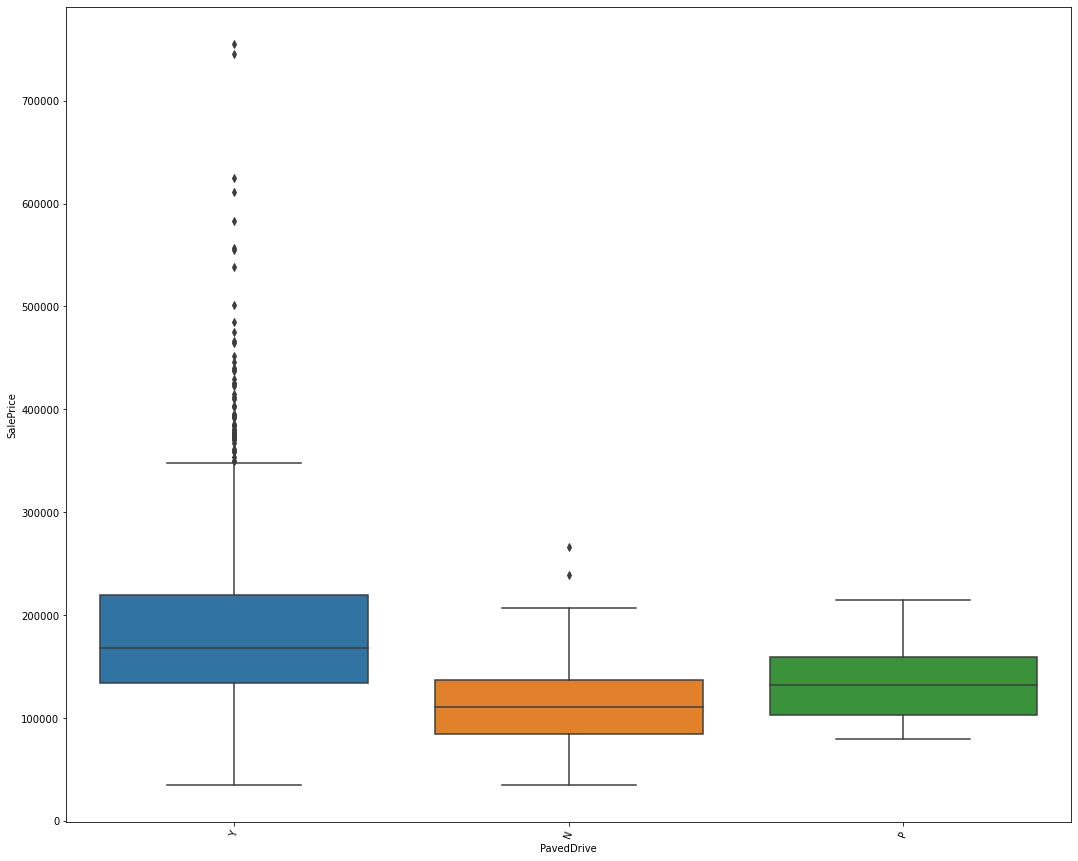

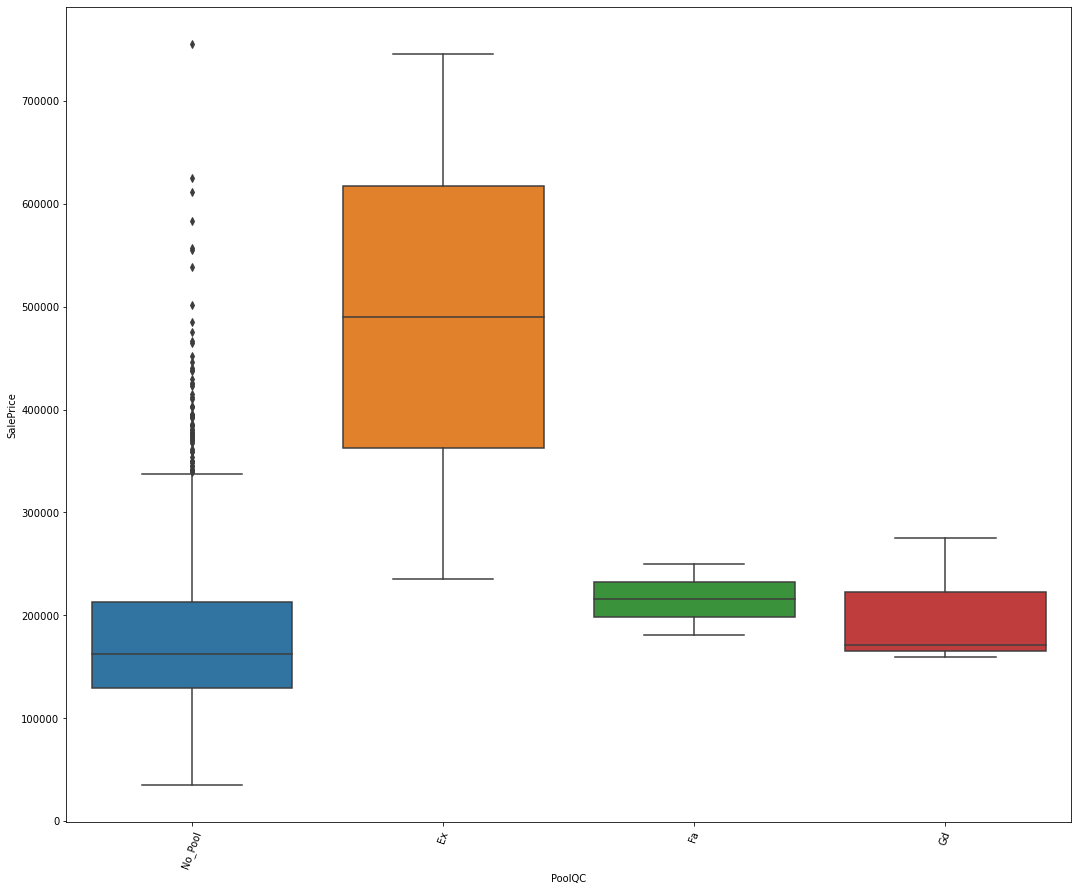

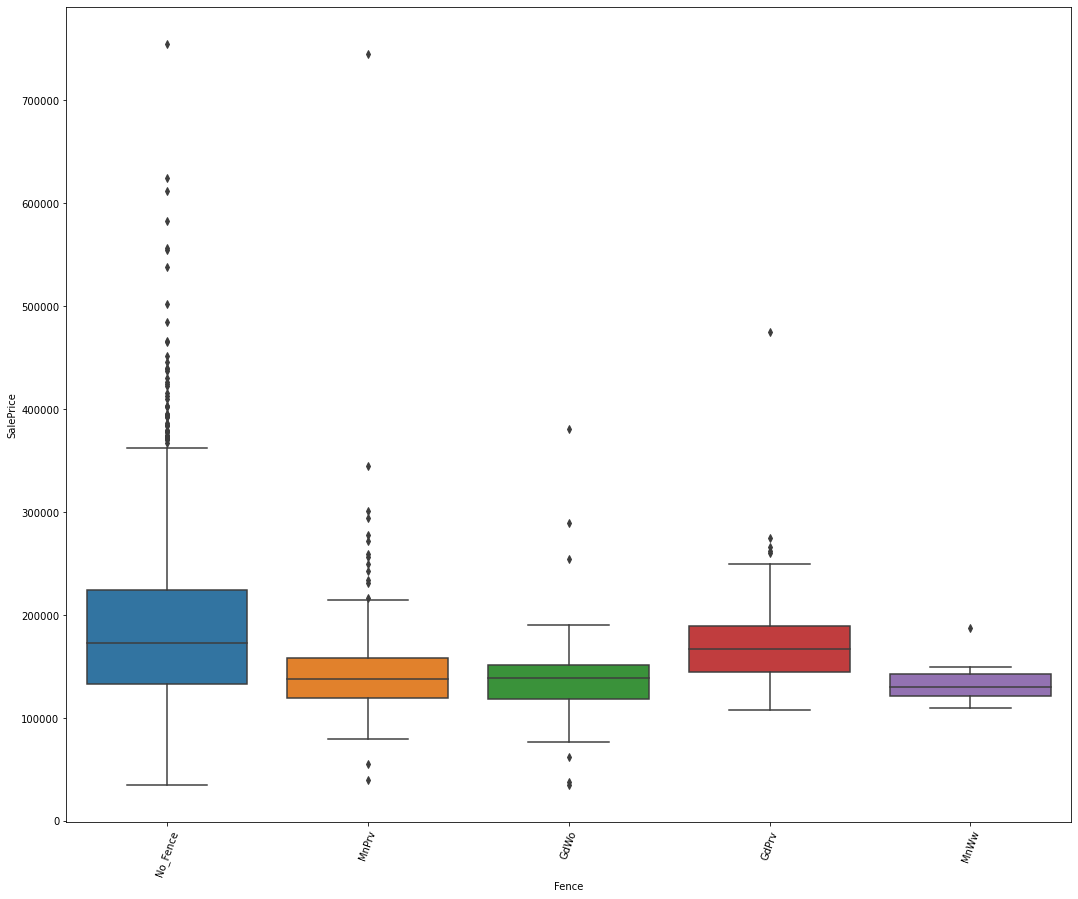

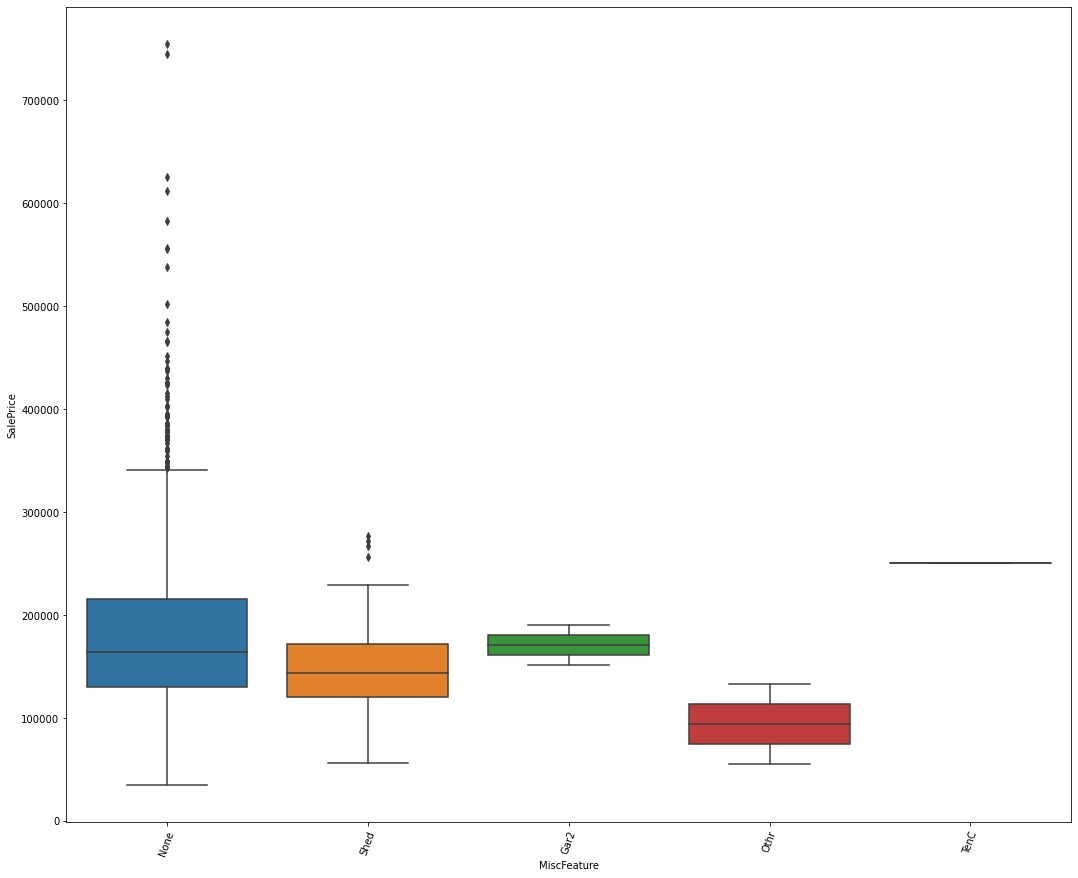

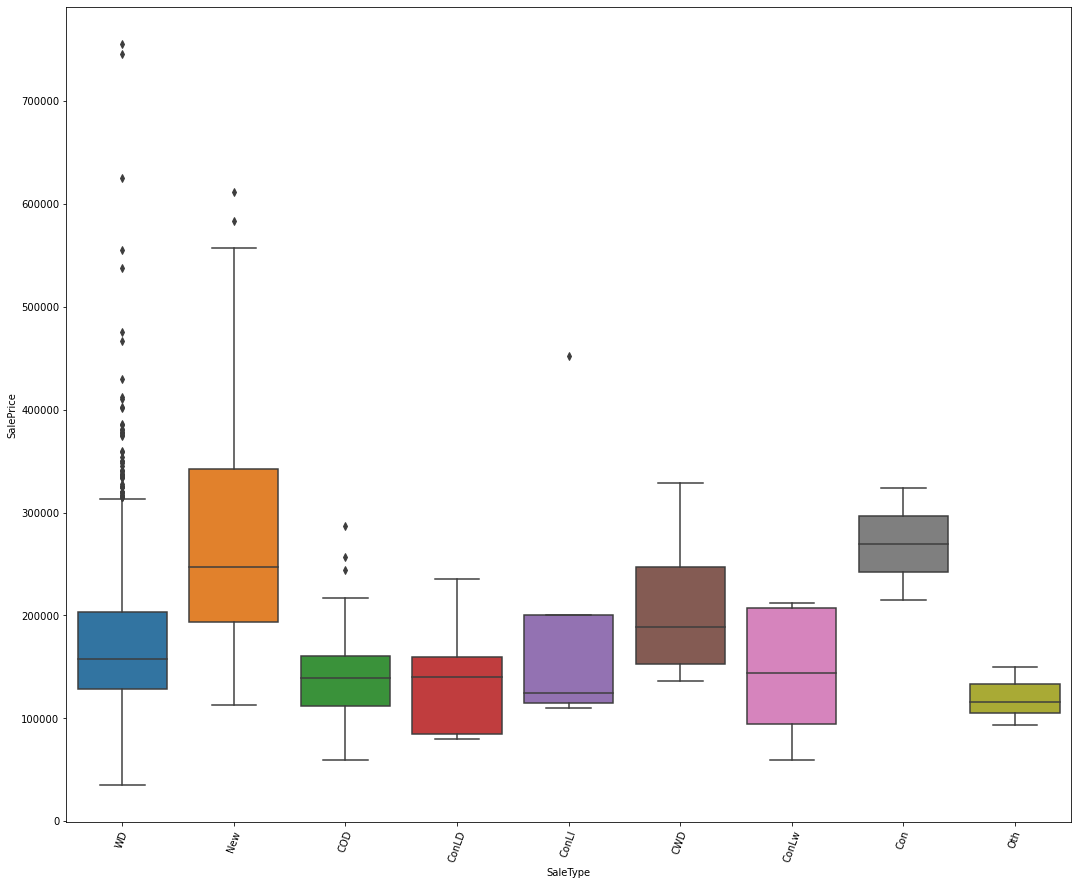

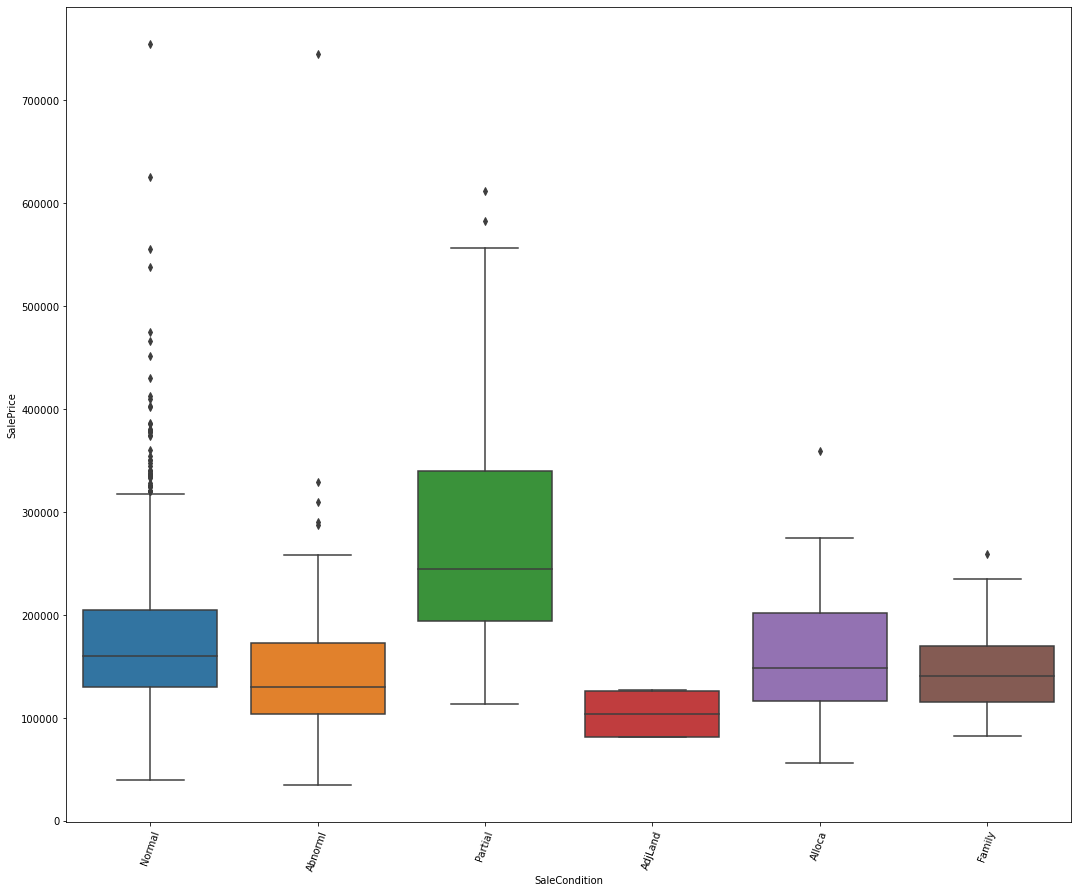

In [17]:
#Plotting all the Categorical Values against SalePrice
Columns_Category = H_data.select_dtypes(include=['object'])
for column_cc in Columns_Category.columns:
    plt.figure(figsize=(18,15))
    sns.boxplot(x=column_cc, y="SalePrice", data=H_data)
    plt.xticks(rotation=70)

Text(0.5, 1.0, 'Overall Condition')

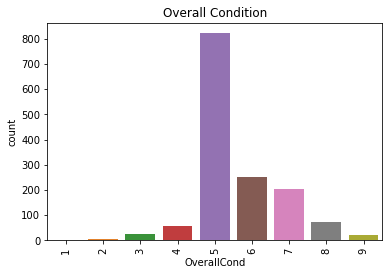

In [18]:
sns.countplot(x='OverallCond', data=H_data).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

               Observation: 5 is the most - overall condition

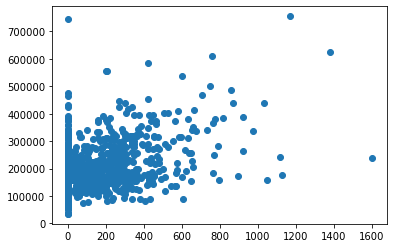

In [19]:
#scatterplot between Masonry veneer area in square feet and saleprice
plt.scatter(H_data['MasVnrArea'],H_data['SalePrice'])

Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

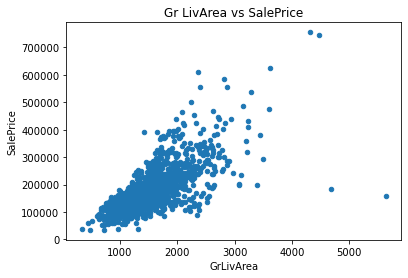

In [20]:
data_sale_gr = pd.concat([H_data['SalePrice'], H_data['GrLivArea']], axis=1)
data_sale_gr.plot.scatter(x='GrLivArea', y='SalePrice');
plt.title('Gr LivArea vs SalePrice')

<AxesSubplot:xlabel='SalePrice'>

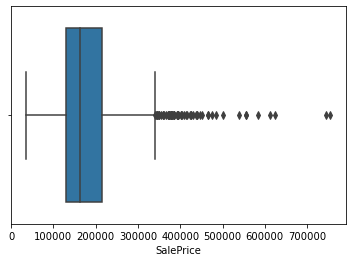

In [21]:
# Find the outliers in the variable "SalesPrice"
sns.boxplot(x='SalePrice', data=H_data)

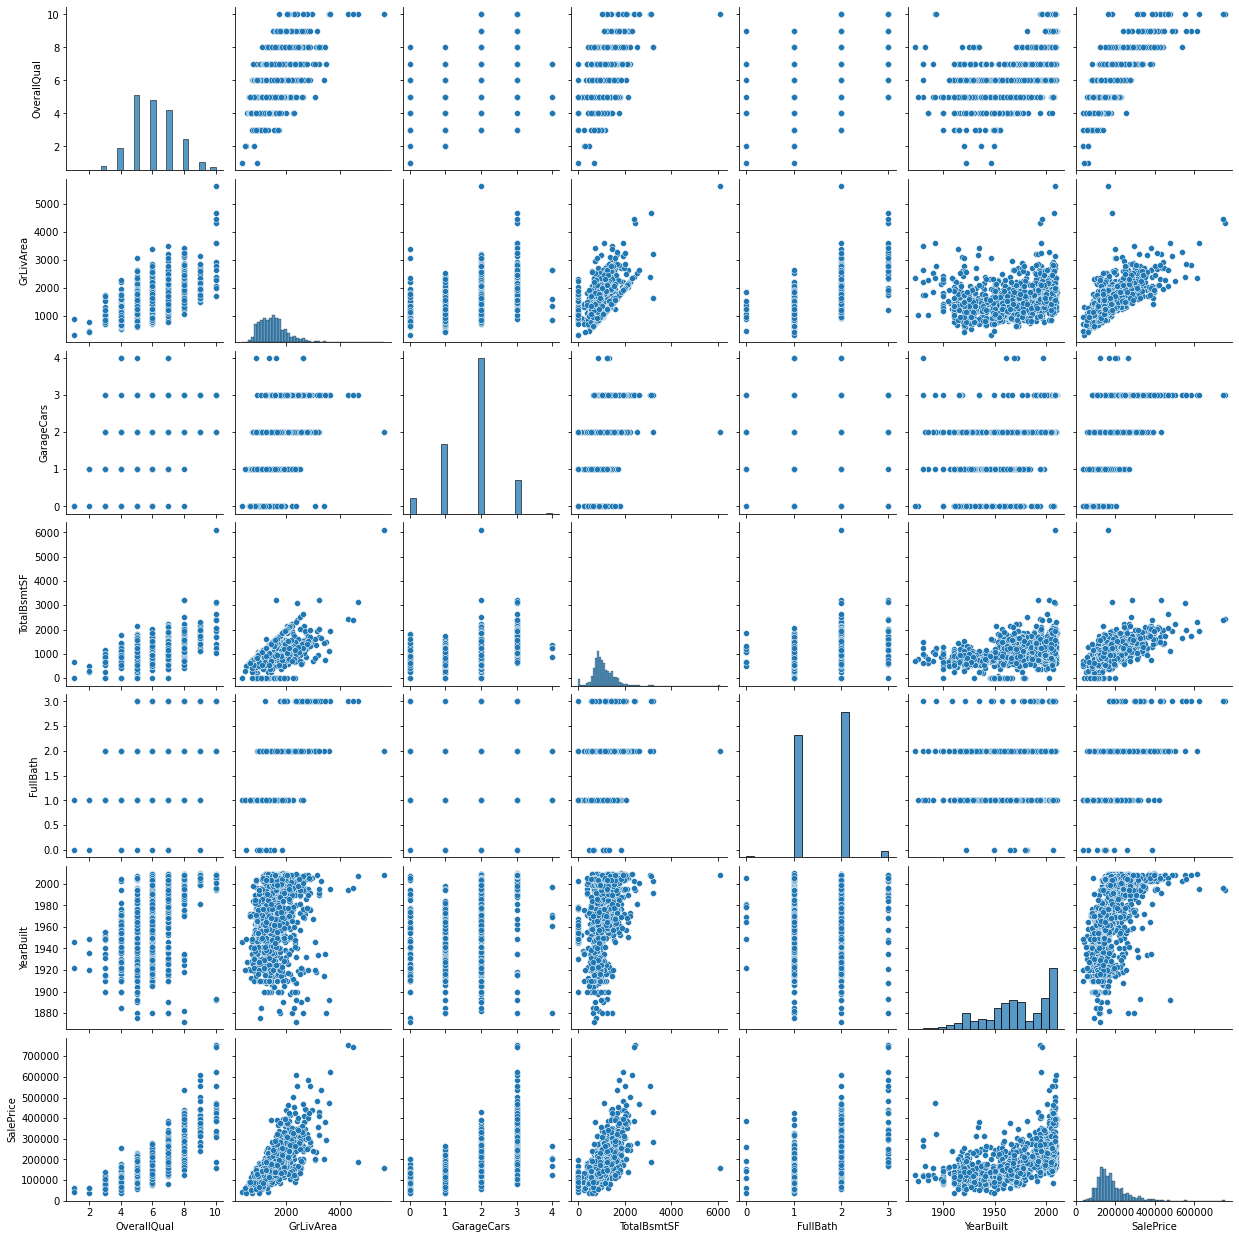

In [22]:
columns = [ 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','SalePrice']
sns.pairplot(H_data[columns])
plt.show()

<AxesSubplot:>

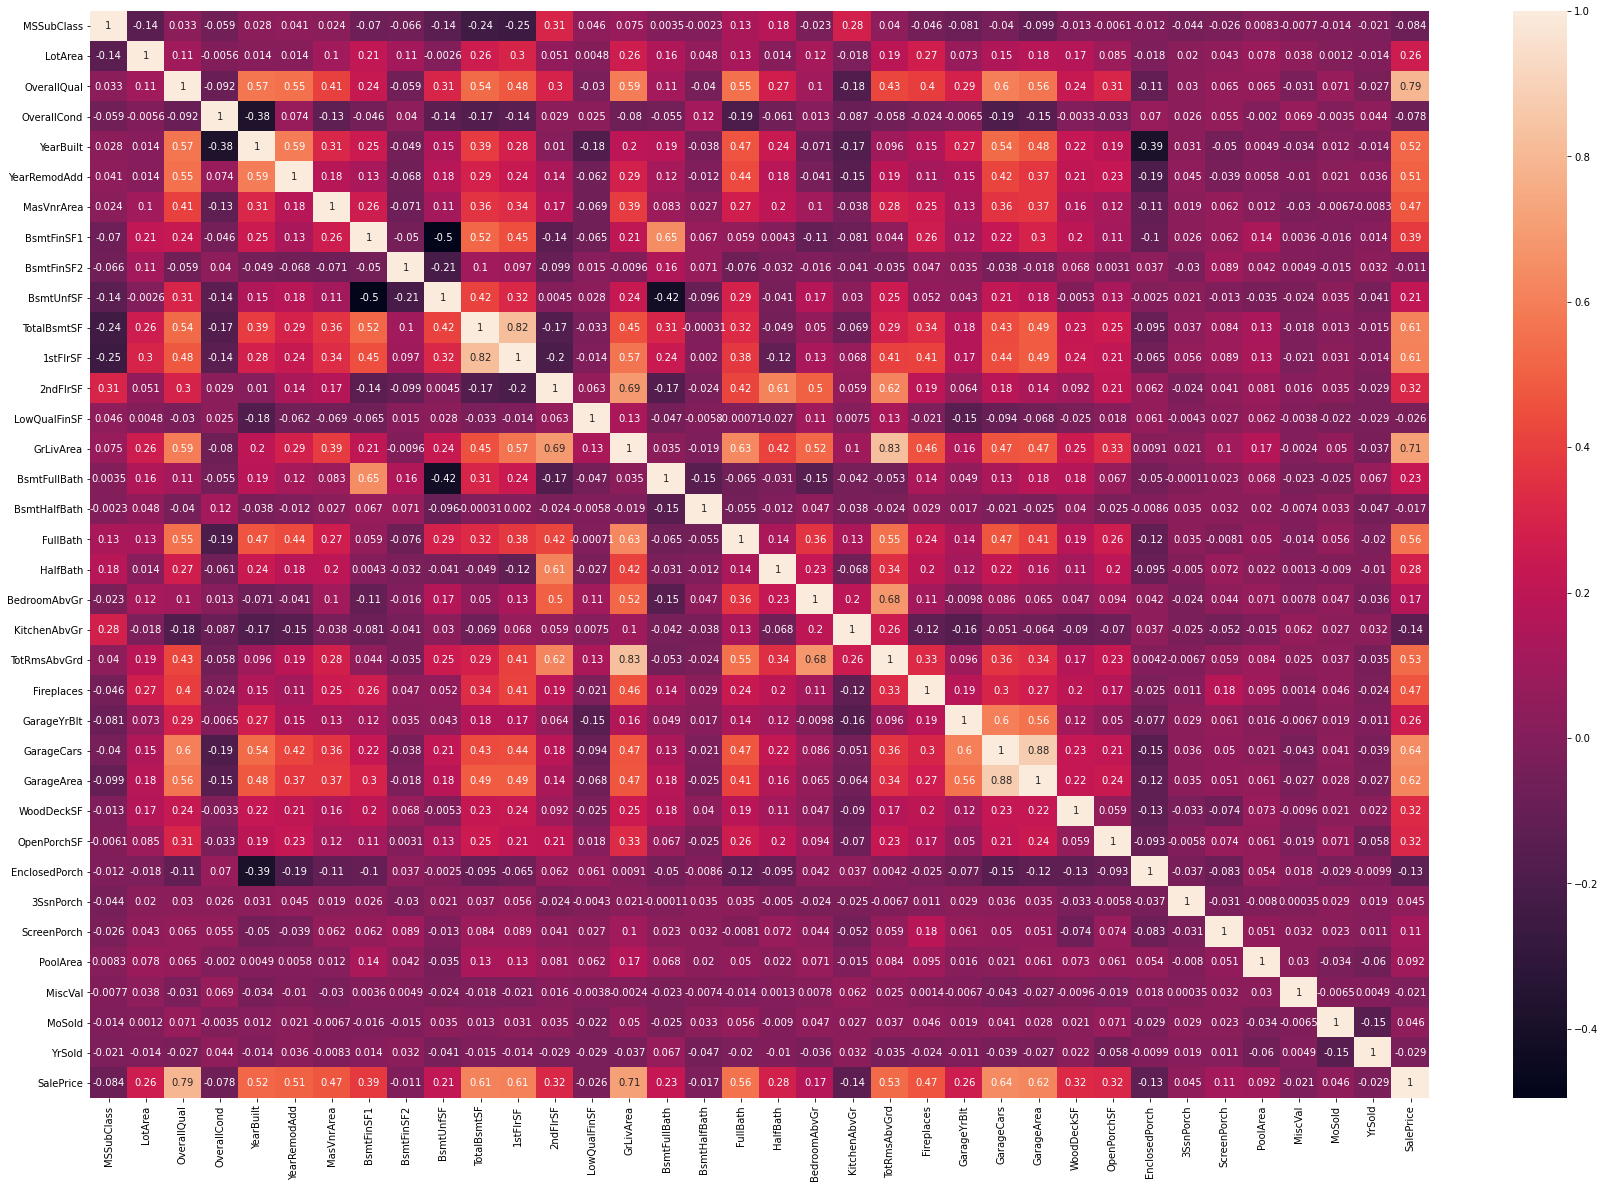

In [23]:
#the correlation matrix
correlation_mat = H_data.corr()
plt.figure(figsize=(30,20))
sns.heatmap(correlation_mat,annot=True)

In [24]:
#Incase there is binary variable, apply a meaningful names
H_data['PavedDrive'] = H_data['PavedDrive'].apply(lambda a : 1 if a == 'Y' else 0)  
H_data['CentralAir'] = H_data['CentralAir'].apply(lambda b : 1 if b == 'Y' else 0)                                              
H_data['Street'] = H_data['Street'].apply(lambda c: 1 if c == 'Pave' else 0 )  


In [25]:
category_values = H_data.select_dtypes(include=['object'])
category_values.head(10)

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,No_Fireplace,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
1,RL,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
2,RL,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
3,RL,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,No_Pool,No_Fence,None,WD,Abnorml
4,RL,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
5,RL,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,No_Fireplace,Attchd,Unf,TA,TA,No_Pool,MnPrv,Shed,WD,Normal
6,RL,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
7,RL,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,Shed,WD,Normal
8,RM,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,TA,Detchd,Unf,Fa,TA,No_Pool,No_Fence,None,WD,Abnorml
9,RL,No_Alley_Access,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,TA,Attchd,RFn,Gd,TA,No_Pool,No_Fence,None,WD,Normal


In [26]:
#Creating dummy values for the categorical variables.
dummy_data = pd.get_dummies(category_values, drop_first=True)
dummy_data.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [27]:
# Droping unwanted columns
H_data.drop(list(category_values.columns),inplace=True, axis=1)

In [28]:
# Concatenate the columns to dataset.
H_data = pd.concat([H_data,dummy_data], axis=1)

In [29]:
H_data.head(10)

,MSSubClass,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,1,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,1,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,1,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,1,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,1,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0
5,50,14115,1,5,5,1993,1995,0.0,732,0,...,0,0,0,0,1,0,0,0,1,0
6,20,10084,1,8,5,2004,2005,186.0,1369,0,...,0,0,0,0,1,0,0,0,1,0
7,60,10382,1,7,6,1973,1973,240.0,859,32,...,0,0,0,0,1,0,0,0,1,0
8,50,6120,1,7,5,1931,1950,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,190,7420,1,5,6,1939,1950,0.0,851,0,...,0,0,0,0,1,0,0,0,1,0


### Model Building and Evaluation

In [30]:
#Split data into training and testing date. Training is of 70 percent and test date is of 30 percent of the given dataset.
H_train_data,H_test_data = train_test_split(H_data, train_size=0.7,test_size = 0.3, random_state=100)

In [31]:
y_target_train = np.log(H_train_data.SalePrice)
X_var_train = H_train_data.drop("SalePrice",axis=1)

In [32]:
y_target_test= np.log(H_test_data.SalePrice)
X_var_test = H_test_data.drop("SalePrice",axis=1)

In [33]:
flt_int_columns=X_var_train.select_dtypes(include=['int64','float64']).columns
flt_int_columns

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [34]:
##   Scaling the data. Fit the training data and transform the test data.
scaler = StandardScaler()
X_var_train[flt_int_columns] = scaler.fit_transform(X_var_train[flt_int_columns])
X_var_test[flt_int_columns] = scaler.transform(X_var_test[flt_int_columns])

## Ridge Regression

In [35]:
##Testing the various values of alpha for tuning the model
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 5.0, 10.0, 50, 100]}
ridgereg = Ridge()
# cross validation
folds = 5
ridgemodel_cv = GridSearchCV(estimator = ridgereg, 
                        param_grid = parameters, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridgemodel_cv.fit(X_var_train, y_target_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 5.0,
                                   10.0, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [36]:
print(ridgemodel_cv.best_params_)
print(ridgemodel_cv.best_score_)

{'alpha': 0.1}
-0.08888098944882783


In [37]:
cv_results = pd.DataFrame(ridgemodel_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009796,0.001836,0.003805,0.000987,0.0001,{'alpha': 0.0001},-0.091274,-0.095970,-0.095115,-0.087270,...,-0.090442,0.004999,14,-0.054605,-0.055116,-0.055868,-0.056766,-0.055703,-0.055612,0.000730
1,0.008600,0.001356,0.003799,0.000748,0.001,{'alpha': 0.001},-0.090983,-0.095920,-0.095063,-0.087130,...,-0.090319,0.005012,13,-0.054636,-0.055125,-0.055882,-0.056849,-0.055737,-0.055646,0.000748
2,0.009496,0.001340,0.004604,0.000483,0.01,{'alpha': 0.01},-0.090336,-0.095578,-0.094677,-0.086390,...,-0.089882,0.004969,8,-0.054827,-0.055242,-0.056021,-0.057084,-0.055876,-0.055810,0.000770
3,0.010232,0.001318,0.003615,0.000486,0.05,{'alpha': 0.05},-0.089986,-0.094656,-0.094106,-0.084322,...,-0.089209,0.004837,4,-0.055804,-0.055717,-0.056608,-0.057731,-0.056751,-0.056522,0.000733
4,0.008020,0.001114,0.003201,0.000400,0.1,{'alpha': 0.1},-0.089849,-0.094134,-0.094175,-0.082815,...,-0.088881,0.004961,1,-0.057018,-0.056194,-0.057298,-0.058636,-0.057873,-0.057404,0.000820
5,0.007626,0.000805,0.003008,0.000013,0.2,{'alpha': 0.2},-0.090371,-0.093811,-0.094777,-0.081243,...,-0.088886,0.005316,2,-0.059147,-0.056934,-0.058598,-0.060613,-0.059764,-0.059011,0.001236
6,0.008816,0.000981,0.003401,0.000479,0.3,{'alpha': 0.3},-0.090967,-0.093766,-0.095287,-0.080172,...,-0.089004,0.005682,3,-0.060826,-0.057553,-0.059779,-0.062291,-0.061428,-0.060376,0.001631
7,0.008223,0.000963,0.003399,0.000491,0.4,{'alpha': 0.4},-0.091500,-0.093849,-0.095743,-0.079512,...,-0.089267,0.005926,5,-0.062214,-0.058068,-0.060730,-0.063693,-0.062831,-0.061507,0.001973
8,0.010241,0.000395,0.004016,0.000028,0.5,{'alpha': 0.5},-0.091857,-0.093888,-0.096105,-0.079479,...,-0.089534,0.005980,6,-0.063437,-0.058535,-0.061536,-0.064837,-0.063983,-0.062466,0.002244
9,0.008399,0.001357,0.003813,0.000745,0.6,{'alpha': 0.6},-0.092051,-0.093944,-0.096400,-0.079521,...,-0.089741,0.006008,7,-0.064470,-0.058963,-0.062212,-0.065800,-0.064951,-0.063279,0.002463


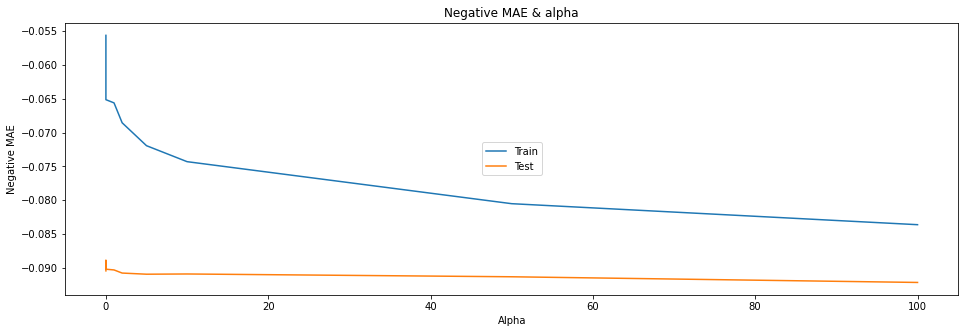

In [38]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative MAE')
plt.title("Negative MAE & alpha")
plt.legend(['Train', 'Test'], loc='center')
plt.show()

In [39]:
#Ridge model with best alpha value.
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_var_train, y_target_train)
ridge.coef_

array([-2.13588683e-02,  1.89916299e-02,  7.32788104e-03,  7.96272008e-02,
        4.07795269e-02,  3.72507374e-02,  2.05612877e-02, -2.78758819e-03,
       -1.30338491e-03,  7.00573179e-03,  4.35785540e-03,  5.54550229e-03,
        1.48199078e-02,  3.71802799e-02,  4.20642007e-02,  8.38654798e-04,
        6.23082078e-02,  2.96128365e-02,  2.70973194e-03,  1.87339625e-02,
        1.07448695e-02,  1.20910988e-02, -1.36071727e-02,  1.55763919e-02,
        2.26747431e-03, -1.68263637e-07,  4.02874958e-02,  4.26597599e-03,
        1.44157825e-03,  1.36107502e-02, -2.04563445e-03,  8.78571434e-03,
        7.21095211e-03,  1.06190229e-02, -1.48411310e-02, -1.44232684e-06,
       -1.10809910e-03, -6.42496907e-03,  4.82665535e-02,  3.90986114e-02,
        6.20215882e-02,  1.56874684e-02,  2.13182526e-03,  2.59755306e-02,
        2.43135413e-02, -5.00428493e-02,  4.82153805e-03,  3.82124377e-02,
        3.57786634e-02,  4.68949873e-02, -1.30779083e-02,  3.69460173e-02,
       -3.54873205e-02, -

In [40]:
#Calculate R-squared value 
y_target_train_pred = ridge.predict(X_var_train)
print(metrics.r2_score(y_true=y_target_train, y_pred=y_target_train_pred))

0.9220052574594756


In [41]:
# Prediction on test set
y_target_test_pred = ridge.predict(X_var_test)
print(metrics.r2_score(y_true=y_target_test, y_pred=y_target_test_pred))

0.8855287818493235


In [42]:
# Display mean square value
mean_squared_error(y_target_test, y_target_test_pred)

0.018835107573615575

In [43]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = H_train_data.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

## Implementation of Lasso Regression

In [44]:
#Testing the various values of alpha.
Lasso_params = {'alpha': [0.00005, 0.0001, 0.001, 0.01, 0.1]}
Lasso_reg = Lasso()
# cross validation
Lasso_crossval= GridSearchCV(estimator = Lasso_reg, 
                        param_grid = Lasso_params, 
                        scoring= 'neg_mean_absolute_error', 
                        return_train_score=True,
                        cv = folds, 
                        verbose = 1)            

Lasso_crossval.fit(X_var_train, y_target_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.01, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [45]:
cv_results_lasso = pd.DataFrame(Lasso_crossval.cv_results_)

In [46]:
print(Lasso_crossval.best_params_)
print(Lasso_crossval.best_score_)

{'alpha': 0.0001}
-0.0833575790520841


In [47]:
ridge_double_coef = ridge.coef_
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_var_train.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Dual Alpha Co-Efficient'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Dual Alpha Co-Efficient'], ascending=False,inplace=True)
print('The predictor variables are as follows:')
ridge_double_coeff.head(10)

The predictor variables are as follows:


,Ridge Dual Alpha Co-Efficient
Neighborhood_Crawfor,0.103582
Neighborhood_NridgHt,0.081037
OverallQual,0.079627
Neighborhood_Somerst,0.068628
GrLivArea,0.062308
MSZoning_RL,0.062022
Neighborhood_StoneBr,0.059838
Condition1_Norm,0.058896
Exterior1st_BrkFace,0.057761
SaleType_ConLD,0.056330


In [48]:
#final lasso model with alpha value 0.001
alpha = 0.001
lasso_final = Lasso(alpha=alpha)     
lasso_final.fit(X_var_train, y_target_train) 

Lasso(alpha=0.001)

In [49]:
#Calculate R2 squared value.
y_target_train_pred = lasso_final.predict(X_var_train)
print(metrics.r2_score(y_true=y_target_train, y_pred=y_target_train_pred))

0.9174442574972889


In [50]:
#R-squared value on test_data

y_target_test_pred = lasso_final.predict(X_var_test)
print(metrics.r2_score(y_true=y_target_test, y_pred=y_target_test_pred))

0.855123192817482


In [51]:
mean_squared_error(y_target_test, y_target_test_pred)

0.023838046736017564

In [52]:
lasso_final.coef_

array([-1.58986880e-02,  1.77328839e-02,  7.45493006e-03,  8.92609173e-02,
        4.49733107e-02,  5.24420084e-02,  2.11904683e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.73403190e-02,
        1.31726648e-02,  5.57365739e-04,  0.00000000e+00, -2.81043595e-03,
        1.18031173e-01,  3.11416982e-02,  2.03120136e-03,  1.33933861e-02,
        8.44317064e-03,  5.66696196e-03, -1.15603901e-02,  1.31358396e-02,
        6.75562031e-03, -1.47256115e-06,  3.89265887e-02,  5.91793364e-03,
        1.83237079e-03,  1.28752008e-02, -0.00000000e+00,  6.00119886e-03,
        5.33435901e-03,  1.05851336e-02, -1.35222907e-02, -9.35029429e-04,
       -1.36117711e-03, -5.93902219e-03,  0.00000000e+00,  0.00000000e+00,
        4.66696364e-02, -7.07128010e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.49559431e-03, -0.00000000e+00,  2.89713629e-02,
       -0.00000000e+00, -

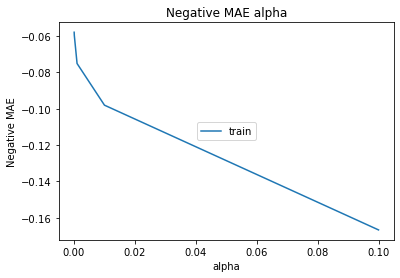

In [53]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative MAE')

plt.title("Negative MAE alpha")
plt.legend(['train', 'test'], loc='center')
plt.show()

In [54]:
ridgemodel_cv.best_params_

{'alpha': 0.1}

In [55]:
ridgereg = Ridge(alpha = 0.1)
ridgereg.fit(X_var_train,y_target_train)

y_train_pred_train = ridge.predict(X_var_train)
print(r2_score(y_target_train,y_train_pred_train))

y_target_pred_test = ridge.predict(X_var_test)
print(r2_score(y_target_test,y_target_pred_test))

0.9220052574594756
0.8855287818493235


In [56]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = H_train_data.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [57]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,11.737392
63,Neighborhood_Crawfor,0.103582
73,Neighborhood_NridgHt,0.081037
4,OverallCond,0.079627
78,Neighborhood_Somerst,0.068628
17,BsmtFullBath,0.062308
41,MSZoning_RL,0.062022
79,Neighborhood_StoneBr,0.059838
83,Condition1_Norm,0.058896
122,Exterior1st_BrkFace,0.057761


In [58]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_var_train,y_target_train)

Lasso(alpha=0.001)

In [59]:
y_train_pred = lasso.predict(X_var_train)
y_test_pred = lasso.predict(X_var_test)

In [60]:
print(r2_score(y_true=y_target_train,y_pred=y_train_pred))
print(r2_score(y_true=y_target_test,y_pred=y_test_pred))

0.9174442574972889
0.855123192817482


In [61]:
mean_squared_error(y_target_test, y_test_pred)

0.023838046736017564

## Conclusion

### For Ridge:
Best Alpha value= 0.1 and R2 value is 0.88

### For Lasso :
Best Alpha value =0.001 and R2 value is 0.85


#### The following features would be enough to explain most of the dataset
- MSSubClass
- RoofMatl_Membran
- MSZoning_FV
- MSZoning_RL
- MSZoning_RH
- MSZoning_RM
- RoofMatl_Roll
- RoofMatl_Metal

### To answer the subjective questions, the alpha value is doubled and recalculated.

In [62]:
#final ridge model
alpha = 0.2
ridge = Ridge(alpha=alpha)

ridge.fit(X_var_train, y_target_train)
ridge.coef_

array([-1.93345153e-02,  2.75425234e-02,  5.69261049e-03,  5.81393854e-02,
        3.73251885e-02,  5.10365146e-02,  2.16485329e-02, -3.81753853e-04,
        2.17530687e-02,  7.98988848e-03,  6.56753070e-03,  3.14186202e-02,
        1.31124230e-02,  4.60303479e-02,  4.69665049e-02,  1.33449572e-03,
        7.29850802e-02,  1.64260194e-02,  9.35623982e-04,  7.92163859e-03,
        2.92882624e-03,  1.01444695e-02, -1.41890970e-02,  4.59259535e-03,
       -2.84330285e-03, -2.55778534e-05,  2.25361500e-02,  1.55141518e-02,
        2.49358079e-03,  1.06628752e-02,  3.30112278e-03,  7.55987447e-03,
        5.42207416e-03,  8.54584568e-03,  6.47877628e-03,  2.38313422e-03,
        6.03069192e-04, -3.34175737e-03,  3.63079413e-01,  3.61341890e-01,
        3.68570213e-01,  3.26663897e-01,  1.87904440e-02,  3.57262991e-02,
        1.54946724e-02, -3.26921072e-02,  7.37684144e-03,  2.91413784e-02,
        2.88338133e-02,  4.18606809e-02, -9.88561615e-02,  3.15656728e-02,
       -4.79679080e-02, -

In [63]:
# Prediction on test set
y_test_pred = ridge.predict(X_var_test)
print(metrics.r2_score(y_true=y_target_test, y_pred=y_test_pred))

0.7864035790812627


In [64]:
ridge_double_coef = ridge.coef_
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_var_train.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Alpha Co-Efficient after Doubling'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Alpha Co-Efficient after Doubling'], ascending=False,inplace=True)
ridge_double_coeff.head(10)

,Ridge Alpha Co-Efficient after Doubling
MSZoning_RL,0.368570
MSZoning_FV,0.363079
MSZoning_RH,0.361342
MSZoning_RM,0.326664
RoofMatl_Membran,0.319111
RoofMatl_WdShngl,0.276994
RoofMatl_Roll,0.258545
Condition2_PosA,0.239357
SaleType_ConLD,0.220710
RoofMatl_CompShg,0.219264


In [65]:
#final lasso model
alpha = 0.002
lasso = Lasso(alpha=alpha)     
lasso.fit(X_var_train, y_target_train) 

Lasso(alpha=0.002)

In [66]:
y_test_pred = lasso.predict(X_var_test)
print(r2_score(y_true=y_target_test,y_pred=y_test_pred))

0.8774018105216189


In [67]:
lasso3_coef = lasso.coef_
y_test_pred = lasso.predict(X_var_test)
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_var_train.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient after Doubling'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient after Doubling'], ascending=False,inplace=True)
lasso3_coeff.head(10)

,Lasso Co-Efficient after Doubling
OverallQual,0.102857
GrLivArea,0.101971
Neighborhood_Crawfor,0.068405
Neighborhood_NridgHt,0.057354
Neighborhood_Somerst,0.055390
Condition1_Norm,0.050890
GarageCars,0.050299
YearBuilt,0.049693
OverallCond,0.042826
BsmtFullBath,0.033121
